# Datathon II

## Merging the data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
import re

In [151]:
survey_2015 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2015Surveys_sample.csv", sep = ";")
survey_2016 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2016Surveys_sample.csv", sep = ";")
survey_2017 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2017Surveys_sample.csv", sep = ";")
survey_2018 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2018Surveys_sample.csv", sep = ";")
survey_2019 = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/2019Surveys_sample.csv", sep = ";")
other_data = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Other_data.csv", sep = ",")

activities = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Activities.xlsx", 'commercial acts')

subjects = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Subject')
course = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Course')
ed_mat = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Educational Material')
support = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Current Support')
languages = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Codes.xlsx", 'Languages')

coverages = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Coverages.xlsx", 'coverages')
dates = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Dates.xlsx", 'dates')

school = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/School locations.xlsx", 'schools')

In [1042]:
survey_2015.shape

(544725, 9)

In [1050]:
survey_2015['Customer heading'].nunique()

13121

In [1051]:
survey_2016['Customer heading'].nunique()

13143

In [1052]:
survey_2017['Customer heading'].nunique()

13155

In [1053]:
survey_2018['Customer heading'].nunique()

13165

In [1054]:
survey_2019['Customer heading'].nunique()

13111

In [1043]:
survey_2016.shape

(556079, 9)

In [1044]:
survey_2017.shape

(560747, 9)

In [1045]:
survey_2018.shape

(559343, 9)

In [1046]:
survey_2019.shape

(554739, 9)

In [389]:
marketing_2019 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2019')
marketing_2018 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2018')
marketing_2017 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2017')
marketing_2016 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2016')
marketing_2015 = pd.read_excel("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Marketing actions.xlsx", '2015')

In [115]:
pd.set_option('display.max_columns', 100)

In [871]:
sum(survey_2019["Publishing group"] == '1')

68818

In [872]:
sum(survey_2018["Publishing group"] == '1')

82507

In [100]:
survey_2019 = survey_2019.rename(columns={'Educational material': 'Educational Material'})
survey_2015 = survey_2015.rename(columns={'Educational material': 'Educational Material'})

In [101]:
# Stacking everything
survey = pd.concat([survey_2019, survey_2018, survey_2017, survey_2016, survey_2015], ignore_index=True)

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [119]:
survey.head()

,# copies,Course,Customer heading,Educational Material,Language,Publishing group,Subject,Type Current Support,Year
0,18,29,113958.0,3,26,25,53,1,2019
1,18,29,113958.0,3,26,25,65,1,2019
2,18,29,113958.0,1,26,25,60,1,2019
3,18,29,113958.0,1,13,25,54,1,2019
4,27,26,113958.0,1,13,28,48,1,2019


In [873]:
survey_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554739 entries, 0 to 554738
Data columns (total 9 columns):
Year                    554739 non-null int64
Course                  554739 non-null int64
Subject                 554739 non-null int64
Educational material    554739 non-null int64
Language                554739 non-null int64
Type Current Support    554739 non-null int64
# copies                554739 non-null int64
Publishing group        554585 non-null object
Customer heading        552577 non-null float64
dtypes: float64(1), int64(7), object(1)
memory usage: 38.1+ MB


In [141]:
# Removed all nan customers and publishers - not useful for analysis
survey_clean = survey.dropna()

In [154]:
survey_clean.to_csv("Survey.csv", index = False)

In [297]:
survey_clean = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Survey.csv")

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [298]:
survey_clean["Publishing group"] = survey_clean["Publishing group"].apply(lambda x: str(x))

In [299]:
survey_clean["Publishing group"] = survey_clean["Publishing group"].astype("category")

In [300]:
survey_clean.head()

,# copies,Course,Customer heading,Educational Material,Language,Publishing group,Subject,Type Current Support,Year
0,18,29,113958.0,3,26,25,53,1,2019
1,18,29,113958.0,3,26,25,65,1,2019
2,18,29,113958.0,1,26,25,60,1,2019
3,18,29,113958.0,1,13,25,54,1,2019
4,27,26,113958.0,1,13,28,48,1,2019


In [880]:
# Filtering out necessary subjects and courses
course_subject = survey_clean[(survey_clean['Subject'] == 13) | (survey_clean['Subject'] == 15) | (survey_clean['Subject'] == 54) | (survey_clean['Subject'] == 60) |
(survey_clean['Subject'] == 65) | (survey_clean['Subject'] == 79)]

In [881]:
school.Region.unique()

array(['País Vasco', 'Castilla la Mancha', 'Comunidad Valenciana',
       'Andalucía', 'Castilla y León', 'Extremadura', 'Islas Baleares',
       nan, 'Cataluña', 'Ceuta', 'Galicia', 'Aragón', 'Islas Canarias',
       'Sin asignar', 'La Rioja', 'Murcia', 'Navarra', 'Asturias',
       'Cantabria', 'Madrid', 'Melilla'], dtype=object)

In [882]:
school.head()

,Customer heading,Latitude,Longitude,Town,Province,Region,Current Seller id,Institution,Titularity
0,113956,42.852859,-2.668525,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
1,113958,42.853774,-2.391622,SALVATIERRA-AGURAIN,Álava,País Vasco,154.0,No,Private
2,113960,42.841873,-2.681587,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
3,113962,42.842855,-2.659526,VITORIA-GASTEIZ,Álava,País Vasco,154.0,No,Catholic
4,113963,42.817684,-2.812399,IRUÑA OKA-IRUÑA DE OCA,Álava,País Vasco,154.0,No,Catholic


In [883]:
# Filtering madrid school
school_madrid = school[(school.Province == 'Madrid') | (school.Province == 'MADRID') | (school.Province == 'Madrid (Comunidad de Madrid)') |
(school.Region == 'Madrid') | (school.Town == 'Madrid') | (school.Town == 'MADRID') ]

### Merging with schools

In [884]:
survey_school = pd.merge(course_subject, school_madrid, how = 'inner', on = 'Customer heading')

In [885]:
survey_school.shape

(154366, 17)

In [886]:
#Filtering out non basic educational materials
survey_school = survey_school[survey_school["Educational Material"] == 1]

In [887]:
survey_school.shape

(131185, 17)

In [889]:
## That's too little!!
sum(survey_school['Publishing group'] == '1')

30920

In [890]:
#Dropping useless columns
survey_school = survey_school.drop(['Region', 'Province', 'Educational Material', 'Language'], axis = 1)

In [891]:
survey_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 154365
Data columns (total 13 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null float64
Publishing group        131185 non-null category
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 13.1+ MB


### Merging activities and marketing actions

In [390]:
marketing = pd.concat([marketing_2019, marketing_2018, marketing_2017, marketing_2016, marketing_2015], ignore_index=True)

In [393]:
#marketing.to_csv("marketing_stacked.csv", index = False)

In [406]:
marketing_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215470 entries, 0 to 215469
Data columns (total 6 columns):
Year                207790 non-null float64
Customer heading    207790 non-null object
Day sent            207790 non-null object
# Mkt_action 1      215470 non-null int64
# Mkt_action 2      11790 non-null float64
# Mkt_action 3      29812 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.9+ MB


In [538]:
marketing = pd.read_csv('/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/marketing_stacked.csv')

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [539]:
marketing = marketing[marketing['Year'].notna()]

In [540]:
marketing.Year = marketing.Year.astype('int64')

### Merging marketing with the main set

In [435]:
marketing.head()

,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,2019,137142,26/06/2019,1.0,NaN,NaN
1,2019,137142,27/05/2019,1.0,NaN,NaN
2,2019,137142,05/06/2019,1.0,NaN,NaN
3,2019,137142,29/05/2019,1.0,NaN,NaN
4,2019,137142,29/05/2019,1.0,NaN,NaN


In [541]:
marketing['a'] = marketing['Customer heading'].str.startswith(("O","H"))

In [542]:
marketing = marketing[marketing['a'] ==False].drop("a", axis = 1)

In [543]:
# Converting to a proper type
survey_school['Customer heading'] = survey_school['Customer heading'].astype('int64').astype('category')
marketing['Customer heading'] = marketing['Customer heading'].astype('int64').astype('category')

In [550]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435538 entries, 0 to 1837538
Data columns (total 6 columns):
Year                1435538 non-null int64
Customer heading    1435538 non-null category
Day sent            1435538 non-null object
# Mkt_action 1      851795 non-null float64
# Mkt_action 2      225577 non-null float64
# Mkt_action 3      249167 non-null float64
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 69.2+ MB


In [551]:
survey_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 154365
Data columns (total 13 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null category
Publishing group        131185 non-null category
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
dtypes: category(2), float64(3), int64(5), object(3)
memory usage: 12.4+ MB


In [554]:
marketing.groupby(['Year', 'Customer heading'])['# Mkt_action 1'].count()

Year  Customer heading
2015  113911              24
      113956              57
      113958               8
      113962              65
      113963               9
                          ..
2019  212896               1
      212899               8
      212914              21
      212917               2
      212961               3
Name: # Mkt_action 1, Length: 44165, dtype: int64

In [544]:
marketing_schools = pd.merge(survey_school,marketing, how = 'left', on = ['Year', 'Customer heading'])


In [546]:
marketing_schools.head()

,# copies,Course,Customer heading,Publishing group,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3
0,135,29,136369,34,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,09/07/2019,0.0,NaN,15.0
1,135,29,136369,34,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,24/01/2019,1.0,NaN,NaN
2,135,29,136369,34,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,24/01/2019,1.0,NaN,NaN
3,135,29,136369,34,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,24/01/2019,1.0,NaN,NaN
4,135,29,136369,34,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,24/01/2019,1.0,NaN,NaN


In [549]:
marketing_schools.shape

(5898182, 17)

In [548]:
marketing_schools.isna().sum()

# copies                      0
Course                        0
Customer heading              0
Publishing group              0
Subject                       0
Type Current Support          0
Year                          0
Latitude                     21
Longitude                    21
Town                          0
Current Seller id            21
Institution                   0
Titularity                   21
Day sent                  31260
# Mkt_action 1          2892870
# Mkt_action 2          4814574
# Mkt_action 3          4609623
dtype: int64

In [499]:
marketing_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 131184
Data columns (total 17 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null int64
Publishing group        131185 non-null category
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
Day sent                0 non-null object
# Mkt_action 1          0 non-null float64
# Mkt_action 2          0 non-null float64
# Mkt_action 3          0 non-null float64
dtypes: category(1), float64(6), int64(6), object(4)
memory usage: 17.1+ MB


In [397]:
survey_school.head()

,# copies,Course,Customer heading,Publishing group,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity
0,135,29,136369.0,34,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic
1,0,29,136369.0,1,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic
2,0,29,136369.0,1,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic
4,135,29,136369.0,1,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic
5,140,30,136369.0,1,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic


In [385]:
survey_school[(survey_school.Course == 26) & (survey_school.Subject == 13)]

,# copies,Course,Customer heading,Publishing group,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity
147,0,26,136370.0,1,13,1,2018,40.408230,-3.676975,MADRID,208.0,No,Catholic
172,110,26,136370.0,1,13,1,2017,40.408230,-3.676975,MADRID,208.0,No,Catholic
242,107,26,136372.0,1,13,1,2019,40.372197,-3.760104,MADRID,208.0,No,Catholic
267,0,26,136372.0,1,13,1,2018,40.372197,-3.760104,MADRID,208.0,No,Catholic
316,116,26,136372.0,1,13,1,2016,40.372197,-3.760104,MADRID,208.0,No,Catholic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154170,0,26,212705.0,1,13,1,2018,40.462455,-3.776128,MADRID,189.0,Yes,Private
154201,18,26,212705.0,1,13,1,2017,40.462455,-3.776128,MADRID,189.0,Yes,Private
154228,18,26,212705.0,1,13,1,2016,40.462455,-3.776128,MADRID,189.0,Yes,Private
154254,17,26,212705.0,1,13,1,2015,40.462455,-3.776128,MADRID,189.0,Yes,Private


## Create target

In [892]:
survey_school.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 154365
Data columns (total 13 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null float64
Publishing group        131185 non-null category
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
dtypes: category(1), float64(4), int64(5), object(3)
memory usage: 13.1+ MB


In [ ]:
publ_1 = survey_school

In [1202]:
year = [2015, 2016, 2017, 2018]
# Creating the key
survey_school['key'] = [str(x) + '_' + str(y) + '_' + str(z) for x, y, z in zip(survey_school['Course'], survey_school['Subject'], survey_school['Customer heading'])]

In [1213]:
survey_school.groupby(['key','Year'])['# copies'].sum().unstack()

Year,2015,2016,2017,2018,2019
key,,,,,
26_13_136370.0,NaN,NaN,110.0,0.0,NaN
26_13_136372.0,NaN,116.0,NaN,0.0,107.0
26_13_136377.0,17.0,NaN,24.0,27.0,27.0
26_13_136378.0,NaN,49.0,52.0,NaN,52.0
26_13_136384.0,60.0,49.0,56.0,50.0,50.0
...,...,...,...,...,...
31_79_212625.0,NaN,NaN,NaN,NaN,46.0
31_79_212675.0,30.0,NaN,47.0,47.0,NaN
31_79_212705.0,NaN,16.0,16.0,5.0,NaN


In [1063]:
dummy_all = pd.get_dummies(columns = ['Publishing group'], data = survey_school)

In [1397]:
survey_school.to_csv("madrid_survey.csv", index = False)

In [563]:
dummy_all.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_0,Publishing group_1,Publishing group_10,Publishing group_11,Publishing group_12,Publishing group_13,Publishing group_14,Publishing group_15,Publishing group_16,Publishing group_17,Publishing group_18,Publishing group_19,Publishing group_2,Publishing group_20,Publishing group_21,Publishing group_22,Publishing group_23,Publishing group_23_BLA,Publishing group_24,Publishing group_25,Publishing group_26,Publishing group_27,Publishing group_27_DIF,Publishing group_28,Publishing group_29,Publishing group_3,Publishing group_30,Publishing group_31,Publishing group_32,Publishing group_33,Publishing group_34,Publishing group_37_SGL,Publishing group_4,Publishing group_41_MKI,Publishing group_42_DXG,Publishing group_43_JMT,Publishing group_44_PLY,Publishing group_5,Publishing group_6,Publishing group_7,Publishing group_8,Publishing group_9
0,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,29,136369,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,29,136369,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,135,29,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,140,30,136369,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [564]:
dummy_all.columns

Index(['# copies', 'Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'Publishing group_0',
       'Publishing group_1', 'Publishing group_10', 'Publishing group_11',
       'Publishing group_12', 'Publishing group_13', 'Publishing group_14',
       'Publishing group_15', 'Publishing group_16', 'Publishing group_17',
       'Publishing group_18', 'Publishing group_19', 'Publishing group_2',
       'Publishing group_20', 'Publishing group_21', 'Publishing group_22',
       'Publishing group_23', 'Publishing group_23_BLA', 'Publishing group_24',
       'Publishing group_25', 'Publishing group_26', 'Publishing group_27',
       'Publishing group_27_DIF', 'Publishing group_28', 'Publishing group_29',
       'Publishing group_3', 'Publishing group_30', 'Publishing group_31',
       'Publishing group_32', 'Publishing group_33', 'Publishing group_34',
       'Publishing group

In [1064]:
target_data = dummy_all[['# copies', 'Course', 'Customer heading', 'Subject',
       'Type Current Support', 'Year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity',
       'Publishing group_1']]

In [568]:
target_data.head(20)

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1
0,135,29,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0
1,0,29,136369,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
2,0,29,136369,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
4,135,29,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
5,140,30,136369,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
7,140,26,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
8,140,26,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0
9,140,26,136369,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1
11,140,30,136369,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0
12,140,30,136369,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1


In [1065]:
target_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131185 entries, 0 to 154365
Data columns (total 13 columns):
# copies                131185 non-null int64
Course                  131185 non-null int64
Customer heading        131185 non-null float64
Subject                 131185 non-null int64
Type Current Support    131185 non-null int64
Year                    131185 non-null int64
Latitude                131164 non-null float64
Longitude               131164 non-null float64
Town                    131185 non-null object
Current Seller id       131164 non-null float64
Institution             131185 non-null object
Titularity              131164 non-null object
Publishing group_1      131185 non-null uint8
dtypes: float64(4), int64(5), object(3), uint8(1)
memory usage: 13.1+ MB


In [1066]:
# Creating the key
target_data['key'] = [str(x) + '_' + str(y) + '_' + str(z) for x, y, z in zip(target_data['Course'], target_data['Subject'], target_data['Customer heading'])]

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 2019-2018

In [1056]:
target_data.shape

(131185, 13)

In [1093]:
target_data.groupby(['Year', 'Publishing group_1'])['Customer heading'].nunique()

Year  Publishing group_1
2015  0                     1207
      1                      701
2016  0                     1227
      1                      707
2017  0                     1251
      1                      696
2018  0                     1268
      1                      699
2019  0                     1273
      1                      652
Name: Customer heading, dtype: int64

In [1098]:
data_2019 = target_data[(target_data.Year == 2019)]

In [1084]:
data_2019.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key
0,135,29,136369.0,65,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369.0
1,0,29,136369.0,79,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369.0
2,0,29,136369.0,60,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0
4,135,29,136369.0,54,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369.0
5,140,30,136369.0,15,1,2019,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_15_136369.0


In [1099]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2018 = target_data[(target_data.Year == 2018)& (target_data['Publishing group_1'] == 1)]

In [1086]:
data_2018.shape

(5946, 14)

In [1100]:
data_2019['Publishing group_1'].value_counts()

0    21418
1     5278
Name: Publishing group_1, dtype: int64

In [1134]:
churn_2019_2018 =pd.merge(data_2019, data_2018, how = 'right', on = ['Customer heading','Course','Subject'])

In [1135]:
churn_2019_2018['churn'] = np.where((churn_2019_2018['Publishing group_1_x'] != churn_2019_2018['Publishing group_1_y'])  | (churn_2019_2018['Publishing group_1_x'].isna()),1,0)

In [1136]:
churn_2019_2018.shape

(5946, 26)

In [1137]:
churn_2019_2018['churn'].value_counts()/churn_2019_2018['churn'].shape[0]

0    0.547595
1    0.452405
Name: churn, dtype: float64

In [1138]:
churn_2019_2018.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude_x,Longitude_x,Town_x,Current Seller id_x,Institution_x,Titularity_x,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Latitude_y,Longitude_y,Town_y,Current Seller id_y,Institution_y,Titularity_y,Publishing group_1_y,key_y,churn
0,0.0,29,136369.0,79,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_79_136369.0,135,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369.0,0
1,0.0,29,136369.0,60,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_60_136369.0,135,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0,0
2,135.0,29,136369.0,54,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_54_136369.0,135,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369.0,0
3,140.0,30,136369.0,15,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_15_136369.0,140,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_15_136369.0,0
4,140.0,26,136369.0,54,1.0,2019.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_54_136369.0,0,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_54_136369.0,0


In [1139]:
# Leaving other columns cause they might have changed
sum(churn_2019_2018['# copies_x'] != churn_2019_2018['# copies_y'])

2724

In [1108]:
churn_2019_2018.groupby(['Course', 'Subject'])['Subject'].count()

Course  Subject
26      13          97
        15         127
        54         204
        60         188
        65          50
        79         172
27      13         104
        15         144
        54         230
        60         196
        65          51
        79         170
28      13         153
        15         183
        54         265
        60         237
        65          45
        79         157
29      13         144
        15         177
        54         256
        60         259
        65          54
        79         150
30      13         149
        15         179
        54         273
        60         264
        65          51
        79         146
31      13         168
        15         167
        54         264
        60         263
        65          52
        79         157
Name: Subject, dtype: int64

# 2018-2017

In [1143]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2018 = target_data[(target_data.Year == 2018)]

In [1144]:
data_2018.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key
31,135,29,136369.0,54,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369.0
32,135,29,136369.0,60,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0
33,135,29,136369.0,79,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369.0
34,140,30,136369.0,15,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_15_136369.0
36,0,26,136369.0,54,1,2018,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_54_136369.0


In [1145]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2017 = target_data[(target_data.Year == 2017)& (target_data['Publishing group_1'] == 1)]

In [1146]:
data_2017.shape

(6388, 14)

In [1147]:
data_2017['Publishing group_1'].value_counts()

1    6388
Name: Publishing group_1, dtype: int64

In [1148]:
data_2018['Publishing group_1'].value_counts()

0    20651
1     5946
Name: Publishing group_1, dtype: int64

In [1149]:
churn_2018_2017 =pd.merge(data_2018, data_2017, how = 'right', on = ['Customer heading','Course','Subject'])

In [1150]:
churn_2018_2017['churn'] = np.where((churn_2018_2017['Publishing group_1_x'] != churn_2018_2017['Publishing group_1_y'] )
                                    | (churn_2018_2017['Publishing group_1_x'].isna()),1,0)

In [1151]:
# Churn rates
churn_2018_2017['churn'].value_counts()/churn_2018_2017['churn'].shape[0]

0    0.600344
1    0.399656
Name: churn, dtype: float64

In [1080]:
churn_2018_2017.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Publishing group_1_y,key_y,churn
0,135.0,29,136369.0,54,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_54_136369.0,140,1,2017,1,29_54_136369.0,0
1,135.0,29,136369.0,79,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_79_136369.0,140,1,2017,1,29_79_136369.0,0
2,0.0,26,136369.0,54,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_54_136369.0,140,1,2017,1,26_54_136369.0,0
3,140.0,30,136369.0,60,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_60_136369.0,140,1,2017,1,30_60_136369.0,0
4,0.0,26,136369.0,79,1.0,2018.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_79_136369.0,140,1,2017,1,26_79_136369.0,0


In [1082]:
churn_2018_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6388 entries, 0 to 6387
Data columns (total 20 columns):
# copies_x                4399 non-null float64
Course                    6388 non-null int64
Customer heading          6388 non-null float64
Subject                   6388 non-null int64
Type Current Support_x    4399 non-null float64
Year_x                    4399 non-null float64
Latitude                  6388 non-null float64
Longitude                 6388 non-null float64
Town                      6388 non-null object
Current Seller id         6388 non-null float64
Institution               6388 non-null object
Titularity                6388 non-null object
Publishing group_1_x      4399 non-null float64
key_x                     4399 non-null object
# copies_y                6388 non-null int64
Type Current Support_y    6388 non-null int64
Year_y                    6388 non-null int64
Publishing group_1_y      6388 non-null uint8
key_y                     6388 non-null objec

In [1081]:
churn_2018_2017.groupby(['Course', 'Subject'])['Subject'].count()

Course  Subject
26      13         112
        15         144
        54         241
        60         207
        65          48
        79         194
27      13         125
        15         149
        54         246
        60         229
        65          49
        79         188
28      13         159
        15         181
        54         292
        60         245
        65          56
        79         177
29      13         156
        15         178
        54         275
        60         258
        65          46
        79         174
30      13         174
        15         192
        54         261
        60         271
        65          53
        79         184
31      13         169
        15         180
        54         274
        60         273
        65          51
        79         177
Name: Subject, dtype: int64

# 2017-2016

In [1152]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2017 = target_data[(target_data.Year == 2017)]

In [1110]:
data_2017.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key
56,140,29,136369.0,65,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,29_65_136369.0
57,140,29,136369.0,54,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_54_136369.0
59,140,29,136369.0,79,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_79_136369.0
61,140,26,136369.0,60,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_60_136369.0
62,140,26,136369.0,54,1,2017,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_54_136369.0


In [1153]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2016 = target_data[(target_data.Year == 2016)& (target_data['Publishing group_1'] == 1)]

In [1154]:
data_2016.shape

(6693, 14)

In [1155]:
data_2017['Publishing group_1'].value_counts()

0    19868
1     6388
Name: Publishing group_1, dtype: int64

In [1156]:
churn_2017_2016 =pd.merge(data_2017, data_2016, how = 'right', on = ['Customer heading','Course','Subject'])

In [1157]:
churn_2017_2016['churn'] = np.where((churn_2017_2016['Publishing group_1_x'] != churn_2017_2016['Publishing group_1_y'])  | (churn_2017_2016['Publishing group_1_x'].isna()),1,0)

In [1158]:
churn_2017_2016['churn'].value_counts()/churn_2017_2016['churn'].shape[0]

0    0.653519
1    0.346481
Name: churn, dtype: float64

In [1115]:
churn_2017_2016.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Publishing group_1_y,key_y,churn
0,140.0,30,136369.0,54,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_54_136369.0,136,1,2016,1,30_54_136369.0,0
1,140.0,30,136369.0,60,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_60_136369.0,136,1,2016,1,30_60_136369.0,0
2,140.0,26,136369.0,79,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_79_136369.0,135,1,2016,1,26_79_136369.0,0
3,135.0,27,136369.0,60,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,27_60_136369.0,136,1,2016,1,27_60_136369.0,0
4,139.0,31,136369.0,54,1.0,2017.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,31_54_136369.0,147,1,2016,1,31_54_136369.0,0


In [1159]:
churn_2016_2015.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Publishing group_1_y,key_y,churn
0,144.0,29,136369.0,60,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_60_136369.0,140,1,2015,1,29_60_136369.0,0
1,136.0,30,136369.0,60,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_60_136369.0,148,1,2015,1,30_60_136369.0,0
2,136.0,30,136369.0,65,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,0.0,30_65_136369.0,148,1,2015,1,30_65_136369.0,1
3,135.0,26,136369.0,79,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_79_136369.0,0,1,2015,1,26_79_136369.0,0
4,136.0,30,136369.0,79,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_79_136369.0,148,1,2015,1,30_79_136369.0,0


# All churn rates

In [1176]:
churn_2019_2018['churn'].value_counts()/churn_2019_2018['churn'].shape[0]

0    0.547595
1    0.452405
Name: churn, dtype: float64

In [1168]:
churn_2018_2017['churn'].value_counts()/churn_2018_2017['churn'].shape[0]

0    0.600344
1    0.399656
Name: churn, dtype: float64

In [1169]:
churn_2017_2016['churn'].value_counts()/churn_2017_2016['churn'].shape[0]

0    0.653519
1    0.346481
Name: churn, dtype: float64

In [1170]:
churn_2016_2015['churn'].value_counts()/churn_2016_2015['churn'].shape[0]

0    0.66581
1    0.33419
Name: churn, dtype: float64

In [1171]:
churn_2017_2016.groupby(['Course', 'Subject'])['Subject'].count()

Course  Subject
26      13         116
        15         145
        54         248
        60         231
        65          58
        79         195
27      13         133
        15         162
        54         264
        60         229
        65          56
        79         206
28      13         168
        15         180
        54         278
        60         270
        65          59
        79         193
29      13         168
        15         184
        54         283
        60         276
        65          60
        79         189
30      13         180
        15         182
        54         289
        60         279
        65          58
        79         172
31      13         183
        15         216
        54         277
        60         265
        65          56
        79         185
Name: Subject, dtype: int64

#  2016-2015

In [1160]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2016 = target_data[(target_data.Year == 2016)]

In [1161]:
data_2016.head()

,# copies,Course,Customer heading,Subject,Type Current Support,Year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,Publishing group_1,key
80,144,29,136369.0,60,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0
83,135,26,136369.0,65,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,26_65_136369.0
84,136,30,136369.0,54,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_54_136369.0
85,136,30,136369.0,60,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_60_136369.0
86,136,30,136369.0,65,1,2016,40.428274,-3.681298,MADRID,208.0,No,Catholic,0,30_65_136369.0


In [1162]:
# Everybody from 2019 who was 1 in 2018 and either converted or not in 2019
data_2015 = target_data[(target_data.Year == 2015)& (target_data['Publishing group_1'] == 1)]

In [966]:
data_2016.shape

(26042, 13)

In [911]:
data_2015['Publishing group_1'].value_counts()

1    6615
Name: Publishing group_1, dtype: int64

In [912]:
data_2016['Publishing group_1'].value_counts()

0    19349
1     6693
Name: Publishing group_1, dtype: int64

In [1163]:
churn_2016_2015 =pd.merge(data_2016, data_2015, how = 'right', on = ['Customer heading','Course','Subject'])

In [1164]:
churn_2016_2015['churn'] = np.where((churn_2016_2015['Publishing group_1_x'] != churn_2016_2015['Publishing group_1_y'])  | (churn_2016_2015['Publishing group_1_x'].isna()),1,0)

In [1165]:
churn_2016_2015['churn'].value_counts()/churn_2016_2015['churn'].shape[0]

0    0.66581
1    0.33419
Name: churn, dtype: float64

In [1166]:
churn_2016_2015.shape

(6616, 26)

In [980]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['Titularity_x'] != churn_2016_2015['Titularity_y'])

0

In [1125]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['# copies_x'] != churn_2016_2015['# copies_y'])

5772

In [1128]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['Type Current Support_x'] != churn_2016_2015['Type Current Support_y'])

2010

In [1129]:
churn_2016_2015.isna().sum()

# copies_x                1989
Course                       0
Customer heading             0
Subject                      0
Type Current Support_x    1989
Year_x                    1989
Latitude                     0
Longitude                    0
Town                         0
Current Seller id            0
Institution                  0
Titularity                   0
Publishing group_1_x      1989
key_x                     1989
# copies_y                   0
Type Current Support_y       0
Year_y                       0
Publishing group_1_y         0
key_y                        0
churn                        0
dtype: int64

In [988]:
4/21

0.19047619047619047

In [956]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['Town_y'] != churn_2016_2015['Town_x'])

0

In [961]:
# Leaving other columns cause they might have changed
sum(churn_2017_2016['Institution_y'] != churn_2017_2016['Institution_x'])

0

In [965]:
# Leaving other columns cause they might have changed
sum(churn_2016_2015['Current Seller id_x'] != churn_2016_2015['Current Seller id_y'])

0

# Stack churn

In [1372]:
stacked_churn = pd.concat([churn_2016_2015, churn_2017_2016, churn_2018_2017, churn_2019_2018], ignore_index = True)

In [1173]:
stacked_churn.groupby(['churn'])['churn'].count()

churn
0    15870
1     9773
Name: churn, dtype: int64

In [1177]:
stacked_churn.head()

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Year_x,Latitude_x,Longitude_x,Town_x,Current Seller id_x,Institution_x,Titularity_x,Publishing group_1_x,key_x,# copies_y,Type Current Support_y,Year_y,Latitude_y,Longitude_y,Town_y,Current Seller id_y,Institution_y,Titularity_y,Publishing group_1_y,key_y,churn
0,144.0,29,136369.0,60,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,29_60_136369.0,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,29_60_136369.0,0
1,136.0,30,136369.0,60,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_60_136369.0,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_60_136369.0,0
2,136.0,30,136369.0,65,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,0.0,30_65_136369.0,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_65_136369.0,1
3,135.0,26,136369.0,79,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,26_79_136369.0,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,26_79_136369.0,0
4,136.0,30,136369.0,79,1.0,2016.0,40.428274,-3.681298,MADRID,208.0,No,Catholic,1.0,30_79_136369.0,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,1,30_79_136369.0,0


In [1184]:
stacked_churn.columns

Index(['# copies_x', 'Course', 'Customer heading', 'Subject',
       'Type Current Support_x', 'Year_x', 'Latitude_x', 'Longitude_x',
       'Town_x', 'Current Seller id_x', 'Institution_x', 'Titularity_x',
       'Publishing group_1_x', 'key_x', '# copies_y', 'Type Current Support_y',
       'Year_y', 'Latitude_y', 'Longitude_y', 'Town_y', 'Current Seller id_y',
       'Institution_y', 'Titularity_y', 'Publishing group_1_y', 'key_y',
       'churn'],
      dtype='object')

In [1373]:
stacked_churn.isna().sum()

# copies_x                7889
Course                       0
Customer heading             0
Subject                      0
Type Current Support_x    7889
Year_x                    7889
Latitude_x                7889
Longitude_x               7889
Town_x                    7889
Current Seller id_x       7889
Institution_x             7889
Titularity_x              7889
Publishing group_1_x      7889
key_x                     7889
# copies_y                   0
Type Current Support_y       0
Year_y                       0
Latitude_y                   0
Longitude_y                  0
Town_y                       0
Current Seller id_y          0
Institution_y                0
Titularity_y                 0
Publishing group_1_y         0
key_y                        0
churn                        0
dtype: int64

In [1188]:
stacked_churn.shape

(25643, 26)

In [1256]:
final_churn[final_churn['Type Current Support_x'] != final_churn['Type Current Support_y']]

,# copies_x,Course,Customer heading,Subject,Type Current Support_x,Current Seller id_x,Institution_x,Titularity_x,Publishing group_1_x,# copies_y,Type Current Support_y,Year_y,Latitude_y,Longitude_y,Town_y,Current Seller id_y,Institution_y,Titularity_y,Publishing group_1_y,key_y,churn
369,97.0,30,136485.0,79,2.0,157.0,No,Catholic,1.0,0,1,2015,40.438265,-3.661214,MADRID,157.0,No,Catholic,1,30_79_136485.0,0
869,50.0,31,136817.0,60,2.0,117.0,Yes,Public,1.0,0,1,2015,40.592651,-3.702407,TRES CANTOS,117.0,Yes,Public,1,31_60_136817.0,0
1224,74.0,27,137059.0,60,2.0,131.0,Yes,Public,0.0,0,1,2015,40.300308,-3.829273,FUENLABRADA,131.0,Yes,Public,1,27_60_137059.0,1
1432,27.0,31,137405.0,15,2.0,159.0,Yes,Private,0.0,29,1,2015,40.460591,-3.482539,TORREJON DE ARDOZ,159.0,Yes,Private,1,31_15_137405.0,1
1433,27.0,31,137405.0,13,2.0,159.0,Yes,Private,0.0,29,1,2015,40.460591,-3.482539,TORREJON DE ARDOZ,159.0,Yes,Private,1,31_13_137405.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25638,NaN,28,212705.0,79,NaN,NaN,NaN,NaN,NaN,5,1,2018,40.462455,-3.776128,MADRID,189.0,Yes,Private,1,28_79_212705.0,1
25639,NaN,29,212719.0,54,NaN,NaN,NaN,NaN,NaN,109,1,2018,40.456178,-3.594880,MADRID,209.0,No,Private,1,29_54_212719.0,1
25640,NaN,26,212719.0,54,NaN,NaN,NaN,NaN,NaN,125,1,2018,40.456178,-3.594880,MADRID,209.0,No,Private,1,26_54_212719.0,1
25641,NaN,30,212719.0,54,NaN,NaN,NaN,NaN,NaN,154,1,2018,40.456178,-3.594880,MADRID,209.0,No,Private,1,30_54_212719.0,1


## Imputing missing values

In [1198]:
final_churn.groupby(['Customer heading', 'Course'])['# copies_x'].median()

Customer heading  Course
136369.0          26        137.5
                  27        136.0
                  28        134.0
                  29        135.0
                  30        140.0
                            ...  
212719.0          27        125.0
                  28          0.0
                  29        109.0
                  30        154.0
                  31          NaN
Name: # copies_x, Length: 3826, dtype: float64

In [1381]:
stacked_churn['change_copies'] = stacked_churn['# copies_x'].fillna(0) - stacked_churn['# copies_y'].fillna(0)

In [1382]:
final_churn = stacked_churn.drop(['Year_x','key_x', 'Latitude_x', 'Longitude_x', 'Town_x',
                                 'Type Current Support_x', 'Titularity_x', 'Institution_x', 'Publishing group_1_y', 
                               'Publishing group_1_x','Current Seller id_x', '# copies_x'], axis = 1)

In [1383]:
final_churn = final_churn.rename(columns={'# copies_y': '# copies', 'Year_y': 'Year', 'key_y':'key', 
                                        'Latitude_y': 'Latitude', 'Town_y':'Town',
                                          'Longitude_y': 'Longitude', 'Type Current Support_y': 'Type Current Support',
                                        'Titularity_y': 'Titularity', 'Institution_y': 'Institution',
                                          'Current Seller id_y': 'Current Seller id'
                                         })

In [1385]:
final_churn.shape

(25643, 15)

In [1380]:
final_churn['Year'].isna()

array([2016.,   nan, 2017., 2018., 2019.])

In [1387]:
final_churn['Year'].value_counts()

2016    6693
2015    6616
2017    6388
2018    5946
Name: Year, dtype: int64

In [1390]:
final_churn[final_churn['Year'] == 2018]['Year'] = 2019
final_churn[final_churn['Year'] == 2017]['Year'] = 2018
final_churn[final_churn['Year'] == 2016]['Year'] = 2017
final_churn[final_churn['Year'] == 2015]['Year'] = 2016

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [1391]:
final_churn['Year'].value_counts()

2016    6693
2015    6616
2017    6388
2018    5946
Name: Year, dtype: int64

In [1369]:
final_churn.to_csv("clean_final.csv", index = False)

# Merging with coverages

In [1349]:
coverages = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/coverage_prepared.csv")

In [1350]:
coverages.head()

,Customer Heading,total_visits,Current id_Representative
0,113896,9.0,1
1,113897,9.0,1
2,113898,9.0,2
3,113899,9.0,1
4,113902,9.0,2


In [1351]:
coverages = coverages.rename(columns={'Current id_Representative':"Numer_of_Representatives", 
                                     'Customer Heading':"Customer heading"})

In [1352]:
final_churn_coverages = pd.merge(final_churn,coverages, how = 'left', on = 'Customer heading')

In [1398]:
final_churn_coverages.head()

,Course,Customer heading,Subject,# copies,Type Current Support,Current year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,key,churn,change_copies,total_visits,Numer_of_Representatives
0,29,136369.0,60,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,29_60_136369.0,0,4.0,9.0,3
1,30,136369.0,60,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_60_136369.0,0,-12.0,9.0,3
2,30,136369.0,65,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_65_136369.0,1,-12.0,9.0,3
3,26,136369.0,79,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,26_79_136369.0,0,135.0,9.0,3
4,30,136369.0,79,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_79_136369.0,0,-12.0,9.0,3


## KPI

**Seller ratio**

In [1424]:
final_churn_coverages.to_csv("utkarsh.csv", index = False)

In [1440]:
seller = (final_churn_coverages.groupby(['Current year','Current Seller id'])['# copies'].sum()/final_churn_coverages.groupby(['Current year','Current Seller id'])['Customer heading'].nunique()).reset_index()

In [1444]:
seller = seller.rename({'0':'sales_ratio_per_seller'})

In [1453]:
seller.columns = ['Current year', 'Current Seller id', 'Sales ratio per customer']

In [1459]:
seller = seller.reset_index().drop('index', axis = 1)

In [1460]:
kpi_1 = pd.merge(final_churn_coverages, seller, how = 'left', on = ['Current year', 'Current Seller id'])

**sku interest**

In [1628]:
sku_interest = kpi_1.groupby(['Customer heading','Current year'])['key'].count().reset_index()

In [1630]:
sku_interest.columns

Index(['Customer heading', 'Current year', 'key'], dtype='object')

In [1631]:
sku_interest.columns = ['Current Seller id','Current year', 'sku_interest']

In [1629]:
sku_interest.head()

,Customer heading,Current year,key
0,136369.0,2015,18
1,136369.0,2016,11
2,136369.0,2017,14
3,136369.0,2018,15
4,136370.0,2015,17


In [1621]:
kpi_2 = pd.merge(kpi_1, sku_interest, how = 'left', on = ['Current year', 'Current Seller id'])

In [1620]:
kpi_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25643 entries, 0 to 25642
Data columns (total 19 columns):
Course                      25643 non-null int64
Customer heading            25643 non-null float64
Subject                     25643 non-null int64
# copies                    25643 non-null int64
Type Current Support        25643 non-null int64
Current year                25643 non-null int64
Latitude                    25643 non-null float64
Longitude                   25643 non-null float64
Town                        25643 non-null object
Current Seller id           25643 non-null float64
Institution                 25643 non-null object
Titularity                  25643 non-null object
key                         25643 non-null object
churn                       25643 non-null int64
change_copies               25643 non-null float64
total_visits                25643 non-null float64
Numer_of_Representatives    25643 non-null int64
Sales ratio per customer    25643 non-null

**# copies per customer**

In [1486]:
copies_per_customer = kpi_2.groupby(['Customer heading','Current year'])['# copies'].sum().reset_index()

In [1488]:
copies_per_customer.columns = ['Customer heading', 'Current year', '# copies per customer']

In [1493]:
kpi_3 = pd.merge(kpi_2, copies_per_customer, how = 'left', on = ['Current year', 'Customer heading'])

**# copies per customer**

In [1524]:
kpi_3.shape

(25643, 20)

In [1420]:
kpi_1.to_csv("kpi.csv", index = False)

In [1409]:
final_churn_coverages.groupby(['Current year','Current Seller id'])['Customer heading'].nunique()

Current year  Current Seller id
2015          100.0                56
              102.0                54
              116.0                44
              117.0                49
              124.0                53
                                   ..
2018          164.0                41
              189.0                51
              199.0                46
              208.0                40
              209.0                39
Name: Customer heading, Length: 62, dtype: int64

In [ ]:
final_churn_coverages['Seller rating'] = final_churn_coverages['# copies']/

In [1399]:
final_churn_coverages.shape

(25643, 17)

In [1354]:
activities = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/activities.csv").drop('Unnamed: 0', axis =1)

In [1341]:
activities.head()

,Date,Type activity,Customer heading,Cicle / Department 1,Cicle / Department 2,Cicle / Department 3,Cicle / Department 4,Delegation
0,2018-07-02,Commercial,122996,ADMINISTRATION,0,0,0,PAÍS VASCO
1,2018-07-02,Commercial,171905,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA
2,2018-07-03,Implementation,196818,ADMINISTRATION,0,0,0,CANARIAS
3,2018-07-03,Commercial,122652,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA
4,2018-07-03,Commercial,212353,ADMINISTRATION,0,0,0,ANDALUCÍA-EXTREMADURA


In [1364]:
final_churn_coverages['Current year'].unique()

array([2015, 2016, 2017, 2018])

In [1346]:
final_churn_coverages("final_churn_coverages.csv", index=False)

TypeError: 'DataFrame' object is not callable

In [1342]:
activities = activities[(activities.Delegation == 'MADRID CENTRO')].drop('Delegation', axis =1)

In [1343]:
activities.shape

(30347, 7)

In [1336]:
churn_coverages_activities = pd.merge(final_churn_coverages,activities, how = 'left', on = 'Customer heading')

In [1344]:
churn_coverages_activities.shape

(513026, 24)

In [1300]:
stacked_churn.groupby(['churn', 'Subject'])['churn'].count()/stacked_churn.groupby(['Subject'])['churn'].count()

churn  Subject
0      13         0.610744
       15         0.626757
       54         0.626271
       60         0.617396
       65         0.608263
       79         0.612694
1      13         0.389256
       15         0.373243
       54         0.373729
       60         0.382604
       65         0.391737
       79         0.387306
Name: churn, dtype: float64

## Reducing memory

In [142]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [11]:
a, NAlist = reduce_mem_usage(survey_2015)

Memory usage of properties dataframe is : 37.403419494628906  MB
******************************
Column:  Year
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  Course
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Subject
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  Educational material
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Language
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  Type Current Support
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  # copies
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  Publishing group
dtype befor

In [12]:
train_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544725 entries, 0 to 544724
Data columns (total 9 columns):
Year                    544725 non-null uint16
Course                  544725 non-null uint8
Subject                 544725 non-null uint16
Educational material    544725 non-null uint8
Language                544725 non-null uint8
Type Current Support    544725 non-null uint8
# copies                544725 non-null uint16
Publishing group        544725 non-null uint8
Customer heading        544725 non-null uint32
dtypes: uint16(3), uint32(1), uint8(5)
memory usage: 7.8 MB


# Modelling

## Logit

In [1528]:
kpi_3.head()

,Course,Customer heading,Subject,# copies,Type Current Support,Current year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,key,churn,change_copies,total_visits,Numer_of_Representatives,Sales ratio per customer,sku_interest,# copies per customer
0,29,136369.0,60,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,29_60_136369.0,0,4.0,9.0,3,491.487805,NaN,1997
1,30,136369.0,60,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_60_136369.0,0,-12.0,9.0,3,491.487805,NaN,1997
2,30,136369.0,65,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_65_136369.0,1,-12.0,9.0,3,491.487805,NaN,1997
3,26,136369.0,79,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,26_79_136369.0,0,135.0,9.0,3,491.487805,NaN,1997
4,30,136369.0,79,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_79_136369.0,0,-12.0,9.0,3,491.487805,NaN,1997


In [1533]:
kpi_3.groupby(['key', 'Current year'])['churn'].mean()

key             Current year
26_13_136370.0  2017            0
                2018            1
26_13_136372.0  2016            1
                2018            0
26_13_136377.0  2015            1
                               ..
31_79_210302.0  2016            0
                2017            1
31_79_210338.0  2017            0
                2018            1
31_79_212376.0  2018            1
Name: churn, Length: 25640, dtype: int64

In [1580]:
loyalty = pd.pivot_table(kpi_3, values = 'churn',  index = 'key', columns = 'Current year', aggfunc = 'count').fillna(0).reset_index()

In [1581]:
loyalty.head()

Current year,key,2015,2016,2017,2018
0,26_13_136370.0,0.0,0.0,1.0,1.0
1,26_13_136372.0,0.0,1.0,0.0,1.0
2,26_13_136377.0,1.0,0.0,1.0,1.0
3,26_13_136378.0,0.0,1.0,1.0,0.0
4,26_13_136384.0,1.0,1.0,1.0,1.0


In [1582]:
loyalty.reset_index().drop('index', axis = 1)

Current year,key,2015,2016,2017,2018
0,26_13_136370.0,0.0,0.0,1.0,1.0
1,26_13_136372.0,0.0,1.0,0.0,1.0
2,26_13_136377.0,1.0,0.0,1.0,1.0
3,26_13_136378.0,0.0,1.0,1.0,0.0
4,26_13_136384.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
10379,31_79_210045.0,0.0,1.0,1.0,0.0
10380,31_79_210087.0,0.0,0.0,1.0,1.0
10381,31_79_210302.0,0.0,1.0,1.0,0.0
10382,31_79_210338.0,0.0,0.0,1.0,1.0


In [1583]:
loyalty.columns

Index(['key', 2015, 2016, 2017, 2018], dtype='object', name='Current year')

In [1584]:
loyalty.reset_index().drop('index', axis = 1).columns = ['key', '2015', '2016', '2017', '2018']

In [1574]:
loyalty.shape

(10384, 6)

## Merging Utkarsh and Max and everyhting else

In [2224]:
max_utkarsh = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/max_utkarsh.csv")

In [2225]:
max_utkarsh = max_utkarsh.rename(columns = {'Current id_Representative':'Numer_of_Representatives'})

In [ ]:
kpi_3 = kpi_3.drop('sku_interest', axis = 1)

In [2227]:
max_utkarsh = max_utkarsh.drop(['Course', 'Subject', '# copies',
       'Type Current Support', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
       'change_copies', 'Numer_of_Representatives', 'Customer heading'], axis = 1)

In [2237]:
max_utkarsh.head()

,Current year,key,Type activity_Administration,Type activity_Collect Information,Type activity_Commercial,Type activity_Customer training,Type activity_Implementation,Type activity_In-house training,Type activity_Internal,Type activity_Others,Type activity_Presentation,Type activity_Prospecting,Type activity_Support,count_cicle,ADMINISTRATION,BIOLOGY AND GEOLOGY,ECONOMY,ENGLISH (INFANT),ENGLISH (PRIMARY),ENGLISH (SECONDARY),FRENCH (PRIMARY),FRENCH (SECONDARY),FRENCH HIGH SCHOOL,GEOGRAPHY AND HISTORY,INFANT,INFORMATION TECHNOLOGY,LATIN & GREEK,LIBRARY,MANAGEMENT BOARD,MATHEMATICS,MUSIC (PRIMARY),MUSIC (SECONDARY),ORIENTATION,OTHER,OWNERSHIP TEAM,PASTORAL TEAM,PHILOSOPHY,PHYSICS AND CHEMISTRY,PLASTIC COURSE,PRIMARY,QUALITY,REGIONAL LANGUAGE,RELIGION (INFANT),RELIGION (PRIMARY),RELIGION (SECONDARY),SCIENCE,SPANISH LANGUAGE,TECHNOLOGY,UNALLOCATED,(blank),# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,total_visits_2015,total_visits_2016,total_visits_2017,total_visits_2018,total_visits_2019
0,2015,29_60_136369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
1,2015,30_60_136369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
2,2015,30_65_136369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
3,2015,26_79_136369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
4,2015,30_79_136369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0


In [2300]:
full_data = pd.merge(kpi_3, max_utkarsh, how = 'inner', on = [ 'key', 'Current year'])

In [2301]:
full_data.drop_duplicates(keep = 'first', inplace = True)

In [2298]:
full_data.shape

(25642, 75)

In [1983]:
full_data.head()

,Course,Customer heading,Subject,# copies,Type Current Support,Current year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,key,churn,change_copies,total_visits,Numer_of_Representatives,Sales ratio per customer,# copies per customer,Type activity_Administration,Type activity_Collect Information,Type activity_Commercial,Type activity_Customer training,Type activity_Implementation,Type activity_In-house training,Type activity_Internal,Type activity_Others,Type activity_Presentation,Type activity_Prospecting,Type activity_Support,count_cicle,ADMINISTRATION,BIOLOGY AND GEOLOGY,ECONOMY,ENGLISH (INFANT),ENGLISH (PRIMARY),ENGLISH (SECONDARY),FRENCH (PRIMARY),FRENCH (SECONDARY),FRENCH HIGH SCHOOL,GEOGRAPHY AND HISTORY,INFANT,INFORMATION TECHNOLOGY,LATIN & GREEK,LIBRARY,MANAGEMENT BOARD,MATHEMATICS,MUSIC (PRIMARY),MUSIC (SECONDARY),ORIENTATION,OTHER,OWNERSHIP TEAM,PASTORAL TEAM,PHILOSOPHY,PHYSICS AND CHEMISTRY,PLASTIC COURSE,PRIMARY,QUALITY,REGIONAL LANGUAGE,RELIGION (INFANT),RELIGION (PRIMARY),RELIGION (SECONDARY),SCIENCE,SPANISH LANGUAGE,TECHNOLOGY,UNALLOCATED,(blank),# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,total_visits_2015,total_visits_2016,total_visits_2017,total_visits_2018,total_visits_2019
0,29,136369.0,60,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,29_60_136369.0,0,4.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
1,30,136369.0,60,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_60_136369.0,0,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
2,30,136369.0,65,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_65_136369.0,1,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
3,26,136369.0,79,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,26_79_136369.0,0,135.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
4,30,136369.0,79,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_79_136369.0,0,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0


## Merging Persio

In [2241]:
activities = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/dates_w_mkt_activities.csv")

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17,18,19,20,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2242]:
activities = activities.drop('Unnamed: 0', axis = 1)

In [2118]:
activities['action_during_deadline'].unique()

array([True, 'True', '0', 0], dtype=object)

In [2056]:
activities.columns

Index(['Year', 'Customer heading', 'Day sent', '# Mkt_action 1',
       '# Mkt_action 2', '# Mkt_action 3', 'Mkt_actions', 'Mkt_impact',
       'deadline_start_month', 'deadline_start_day', 'deadline_end_month',
       'deadline_end_day', 'course_start_month', 'course_start_day',
       'course_end_month', 'course_end_day', 'dead_line_start',
       'dead_line_end', 'course_start', 'course_end', 'days_dif_deadline_end',
       'days_dif_deadline_start', 'days_dif_course_start',
       'days_dif_course_end', 'action_during_class', 'action_during_deadline'],
      dtype='object')

In [2184]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1830189 entries, 0 to 1830188
Data columns (total 26 columns):
Current year               int64
Customer heading           int64
Day sent                   object
# Mkt_action 1             int64
# Mkt_action 2             int64
# Mkt_action 3             int64
Mkt_actions                int64
Mkt_impact                 int64
deadline_start_month       int64
deadline_start_day         int64
deadline_end_month         int64
deadline_end_day           int64
course_start_month         int64
course_start_day           int64
course_end_month           int64
course_end_day             int64
dead_line_start            object
dead_line_end              object
course_start               object
course_end                 object
days_dif_deadline_end      float64
days_dif_deadline_start    float64
days_dif_course_start      float64
days_dif_course_end        float64
action_during_class        bool
action_during_deadline     bool
dtypes: bool(2), f

In [2248]:
activities['action_during_class'] = activities['action_during_class'].astype(bool)
activities['action_during_deadline'] = activities['action_during_deadline'].astype(bool)

In [2165]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25642 entries, 0 to 25648
Data columns (total 75 columns):
Course                               25642 non-null int64
Customer heading                     25642 non-null float64
Subject                              25642 non-null int64
# copies                             25642 non-null int64
Type Current Support                 25642 non-null int64
Current year                         25642 non-null int64
Latitude                             25642 non-null float64
Longitude                            25642 non-null float64
Town                                 25642 non-null object
Current Seller id                    25642 non-null float64
Institution                          25642 non-null object
Titularity                           25642 non-null object
key                                  25642 non-null object
churn                                25642 non-null int64
change_copies                        25642 non-null float64
total_v

In [2156]:
activities.head()

,Year,Customer heading,Day sent,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,Mkt_actions,Mkt_impact,deadline_start_month,deadline_start_day,deadline_end_month,deadline_end_day,course_start_month,course_start_day,course_end_month,course_end_day,dead_line_start,dead_line_end,course_start,course_end,days_dif_deadline_end,days_dif_deadline_start,days_dif_course_start,days_dif_course_end,action_during_class,action_during_deadline
0,2015,113911,2015-10-29,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,29.0,120.0,150.0,150.0,False,True
1,2015,113911,2015-11-02,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,29.0,120.0,150.0,150.0,False,True
2,2015,113911,2015-10-29,0,0,1,3,1,7,1,9,30,6,1,6,1,2015-07-01 00:00:00,2015-09-30 00:00:00,2015-06-01 00:00:00,2015-06-01 00:00:00,48.0,167.0,167.0,167.0,False,True
3,2015,113911,2015-06-17,1,0,0,1,1,1,1,4,30,1,1,1,1,2015-01-01 00:00:00,2015-04-30 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,48.0,167.0,167.0,167.0,False,True
4,2015,113911,2015-06-17,1,0,0,1,1,1,1,4,30,1,1,1,1,2015-01-01 00:00:00,2015-04-30 00:00:00,2015-01-01 00:00:00,2015-01-01 00:00:00,48.0,167.0,167.0,167.0,False,True


In [2174]:
full_data.head()

,Course,Customer heading,Subject,# copies,Type Current Support,Current year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,key,churn,change_copies,total_visits,Numer_of_Representatives,Sales ratio per customer,# copies per customer,Type activity_Administration,Type activity_Collect Information,Type activity_Commercial,Type activity_Customer training,Type activity_Implementation,Type activity_In-house training,Type activity_Internal,Type activity_Others,Type activity_Presentation,Type activity_Prospecting,Type activity_Support,count_cicle,ADMINISTRATION,BIOLOGY AND GEOLOGY,ECONOMY,ENGLISH (INFANT),ENGLISH (PRIMARY),ENGLISH (SECONDARY),FRENCH (PRIMARY),FRENCH (SECONDARY),FRENCH HIGH SCHOOL,GEOGRAPHY AND HISTORY,INFANT,INFORMATION TECHNOLOGY,LATIN & GREEK,LIBRARY,MANAGEMENT BOARD,MATHEMATICS,MUSIC (PRIMARY),MUSIC (SECONDARY),ORIENTATION,OTHER,OWNERSHIP TEAM,PASTORAL TEAM,PHILOSOPHY,PHYSICS AND CHEMISTRY,PLASTIC COURSE,PRIMARY,QUALITY,REGIONAL LANGUAGE,RELIGION (INFANT),RELIGION (PRIMARY),RELIGION (SECONDARY),SCIENCE,SPANISH LANGUAGE,TECHNOLOGY,UNALLOCATED,(blank),# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,total_visits_2015,total_visits_2016,total_visits_2017,total_visits_2018,total_visits_2019
0,29,136369.0,60,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,29_60_136369.0,0,4.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
1,30,136369.0,60,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_60_136369.0,0,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
2,30,136369.0,65,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_65_136369.0,1,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
3,26,136369.0,79,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,26_79_136369.0,0,135.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0
4,30,136369.0,79,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_79_136369.0,0,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,5.0,6.0,7.0,8.0,9.0


In [2243]:
activities = activities.rename(columns ={ 'Year': 'Current year'})

In [2250]:
activities_merged = pd.pivot_table(data = activities, index = ['Customer heading', 'Current year'], values = ['Mkt_impact', 'Mkt_actions', 'deadline_start_month', 'deadline_start_day',
                                'deadline_end_month','deadline_end_day','course_start_month','course_end_month',
                                'course_end_day', 'days_dif_deadline_end', 'days_dif_deadline_start', 'days_dif_course_start',
                                'days_dif_course_end', 'action_during_class', 'action_during_deadline'],
aggfunc={'Mkt_impact': lambda x: sum(x), 'Mkt_actions': lambda x: np.mean(x), 
        'deadline_start_month': lambda x: np.mean(x), 'deadline_start_day': lambda x: np.mean(x), 'deadline_end_month': lambda x: np.mean(x), 
        'deadline_end_month': lambda x: np.mean(x), 'deadline_end_day': lambda x: np.mean(x), 'course_start_month': lambda x: np.mean(x),
        'course_end_month': lambda x: np.mean(x), 'course_end_day': lambda x: np.mean(x), 'days_dif_deadline_end':  lambda x: np.mean(x),
        'days_dif_deadline_start':  lambda x: np.mean(x),  'days_dif_course_start': lambda x: np.mean(x), 'days_dif_course_end': lambda x: np.mean(x),
        'action_during_class': lambda x: np.mean(x), 'action_during_deadline': lambda x: np.mean(x)})

In [2299]:
#full_data = full_data.rename(columns = {'Current year': 'Year'})

In [2302]:
all_data = pd.merge(full_data, activities_merged, how = 'left', on = [ 'Customer heading', 'Current year'])

In [2303]:
all_data.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'key', 'churn',
       'change_copies', 'total_visits', 'Numer_of_Representatives',
       'Sales ratio per customer', '# copies per customer',
       'Type activity_Administration', 'Type activity_Collect Information',
       'Type activity_Commercial', 'Type activity_Customer training',
       'Type activity_Implementation', 'Type activity_In-house training',
       'Type activity_Internal', 'Type activity_Others',
       'Type activity_Presentation', 'Type activity_Prospecting',
       'Type activity_Support', 'count_cicle', 'ADMINISTRATION',
       'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY AND HISTORY',
       'INFANT', 'INFORMATION TECHNOLOGY', 

In [2304]:
# Fillna
all_data = all_data.fillna(all_data.mean()).drop(['total_visits_2015', 'total_visits_2016', 'total_visits_2017', 'total_visits_2018', 'total_visits_2019', 'Numer_of_Representatives'], axis = 1)

In [2212]:
coverages_prep = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/coverage_prepared.csv")

In [2207]:
coverages_prep.head()

,Customer Heading,Current year,visits,Current id_Representative
0,113896,2015,5.0,1
1,113896,2016,6.0,1
2,113896,2017,7.0,1
3,113896,2018,8.0,1
4,113896,2019,9.0,1


In [2254]:
coverages_prep = coverages_prep.rename(columns = {'Customer Heading': 'Customer heading', 'Current id_Representative':'Number_of_Representatives'})

In [2305]:
full_data = pd.merge(all_data, coverages_prep, on = ['Customer heading', 'Current year'], how = 'left')

In [2306]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25642 entries, 0 to 25641
Data columns (total 86 columns):
Course                               25642 non-null int64
Customer heading                     25642 non-null float64
Subject                              25642 non-null int64
# copies                             25642 non-null int64
Type Current Support                 25642 non-null int64
Current year                         25642 non-null int64
Latitude                             25642 non-null float64
Longitude                            25642 non-null float64
Town                                 25642 non-null object
Current Seller id                    25642 non-null float64
Institution                          25642 non-null object
Titularity                           25642 non-null object
key                                  25642 non-null object
churn                                25642 non-null int64
change_copies                        25642 non-null float64
total_v

In [2222]:
full_data.head()

,Course,Customer heading,Subject,# copies,Type Current Support,Current year,Latitude,Longitude,Town,Current Seller id,Institution,Titularity,key,churn,change_copies,total_visits,Numer_of_Representatives,Sales ratio per customer,# copies per customer,Type activity_Administration,Type activity_Collect Information,Type activity_Commercial,Type activity_Customer training,Type activity_Implementation,Type activity_In-house training,Type activity_Internal,Type activity_Others,Type activity_Presentation,Type activity_Prospecting,Type activity_Support,count_cicle,ADMINISTRATION,BIOLOGY AND GEOLOGY,ECONOMY,ENGLISH (INFANT),ENGLISH (PRIMARY),ENGLISH (SECONDARY),FRENCH (PRIMARY),FRENCH (SECONDARY),FRENCH HIGH SCHOOL,GEOGRAPHY AND HISTORY,INFANT,INFORMATION TECHNOLOGY,LATIN & GREEK,LIBRARY,MANAGEMENT BOARD,MATHEMATICS,MUSIC (PRIMARY),MUSIC (SECONDARY),ORIENTATION,OTHER,OWNERSHIP TEAM,PASTORAL TEAM,PHILOSOPHY,PHYSICS AND CHEMISTRY,PLASTIC COURSE,PRIMARY,QUALITY,REGIONAL LANGUAGE,RELIGION (INFANT),RELIGION (PRIMARY),RELIGION (SECONDARY),SCIENCE,SPANISH LANGUAGE,TECHNOLOGY,UNALLOCATED,(blank),# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,Mkt_actions,Mkt_impact,action_during_class,action_during_deadline,course_end_day,course_end_month,course_start_month,days_dif_course_end,days_dif_course_start,days_dif_deadline_end,days_dif_deadline_start,deadline_end_day,deadline_end_month,deadline_start_day,deadline_start_month,visits,Current id_Representative
0,29,136369.0,60,140,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,29_60_136369.0,0,4.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,1.03611,1578,0.372354,1,2.75467,1.87671,1.87671,86.9589,86.9589,-0.824408,66.9489,18.8294,4.21544,4.27397,2.46077,5.0,3
1,30,136369.0,60,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_60_136369.0,0,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,1.03611,1578,0.372354,1,2.75467,1.87671,1.87671,86.9589,86.9589,-0.824408,66.9489,18.8294,4.21544,4.27397,2.46077,5.0,3
2,30,136369.0,65,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_65_136369.0,1,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,1.03611,1578,0.372354,1,2.75467,1.87671,1.87671,86.9589,86.9589,-0.824408,66.9489,18.8294,4.21544,4.27397,2.46077,5.0,3
3,26,136369.0,79,0,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,26_79_136369.0,0,135.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,1.03611,1578,0.372354,1,2.75467,1.87671,1.87671,86.9589,86.9589,-0.824408,66.9489,18.8294,4.21544,4.27397,2.46077,5.0,3
4,30,136369.0,79,148,1,2015,40.428274,-3.681298,MADRID,208.0,No,Catholic,30_79_136369.0,0,-12.0,9.0,3,491.487805,1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,619.0,410.0,549.0,1.03611,1578,0.372354,1,2.75467,1.87671,1.87671,86.9589,86.9589,-0.824408,66.9489,18.8294,4.21544,4.27397,2.46077,5.0,3


In [2267]:
full_data.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'key', 'churn',
       'change_copies', 'total_visits', 'Sales ratio per customer',
       '# copies per customer', 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support', 'count_cicle',
       'ADMINISTRATION', 'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY AND HISTORY',
       'INFANT', 'INFORMATION TECHNOLOGY', 'LATIN & GREEK', 'LIBRARY',
       

In [65]:
full_data[['Course', 'Customer heading', 'Subject', 
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support',
       
     ]] = full_data[['Course', 'Customer heading', 'Subject', 
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support',
      ]].astype('category')

In [105]:
full_data[['Course', 'Customer heading', 'Subject', 
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support',
       'action_during_class', 'action_during_deadline',
       'course_end_day', 'course_end_month', 'course_start_month','deadline_end_day', 'deadline_end_month',
       'deadline_start_day', 'deadline_start_month'
     ]] = full_data[['Course', 'Customer heading', 'Subject', 
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
 'Type activity_Administration',
       'Type activity_Collect Information', 'Type activity_Commercial',
       'Type activity_Customer training', 'Type activity_Implementation',
       'Type activity_In-house training', 'Type activity_Internal',
       'Type activity_Others', 'Type activity_Presentation',
       'Type activity_Prospecting', 'Type activity_Support',
       'action_during_class', 'action_during_deadline',
       'course_end_day', 'course_end_month', 'course_start_month','deadline_end_day', 'deadline_end_month',
       'deadline_start_day', 'deadline_start_month']].astype('category')

In [92]:
full_data = full_data.drop('key', axis = 1)

KeyError: "['key'] not found in axis"

In [2309]:
full_data = full_data.drop('total_visits', axis = 1)

In [ ]:
'days_dif_course_end','days_dif_course_start', 'days_dif_deadline_end', 'days_dif_deadline_start'

In [2287]:
full_data['Mkt_actions'] =='mean'

0        False
1        False
2        False
3        False
4        False
         ...  
25637     True
25638     True
25639     True
25640     True
25641     True
Name: Mkt_actions, Length: 25642, dtype: bool

In [104]:
full_data[['Mkt_actions', 'Mkt_impact','days_dif_course_end','days_dif_course_start', 'days_dif_deadline_end', 'days_dif_deadline_start' 
           ]] =full_data[['Mkt_actions', 'Mkt_impact', 
                         'days_dif_course_end','days_dif_course_start', 'days_dif_deadline_end', 'days_dif_deadline_start']].astype('float64')

In [93]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25642 entries, 0 to 25641
Data columns (total 70 columns):
Course                               25642 non-null category
Customer heading                     25642 non-null category
Subject                              25642 non-null category
# copies                             25642 non-null int64
Type Current Support                 25642 non-null category
Current year                         25642 non-null category
Latitude                             25642 non-null category
Longitude                            25642 non-null category
Town                                 25642 non-null category
Current Seller id                    25642 non-null category
Institution                          25642 non-null category
Titularity                           25642 non-null category
churn                                25642 non-null category
change_copies                        25642 non-null float64
total_visits                         2564

In [63]:
full_data = full_data.drop(['total_visits_2016', 'total_visits_2017', 'total_visits_2018', 'total_visits_2019'], axis =1)

In [2314]:
full_data.to_csv("data_14_16.csv", index = False)

In [64]:
full_data.drop_duplicates(keep = 'first', inplace = True)

In [2313]:
full_data.shape

(25642, 84)

In [102]:
full_data = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/cast_cat_17_10.csv")

In [103]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25642 entries, 0 to 25641
Data columns (total 75 columns):
Course                               25642 non-null int64
Customer heading                     25642 non-null float64
Subject                              25642 non-null int64
# copies                             25642 non-null int64
Type Current Support                 25642 non-null int64
Current year                         25642 non-null int64
Latitude                             25642 non-null float64
Longitude                            25642 non-null float64
Town                                 25642 non-null object
Current Seller id                    25642 non-null float64
Institution                          25642 non-null object
Titularity                           25642 non-null object
churn                                25642 non-null int64
change_copies                        25642 non-null float64
Sales ratio per customer             25642 non-null float64
# copi

In [44]:
full_data.to_csv("cast_cat_17_10.csv", index = False)

# ML

## Logit

In [32]:
full_data = full_data.drop(['(blank)', 'RELIGION (SECONDARY)', 'RELIGION (INFANT)','MUSIC (SECONDARY)', 
                           'FRENCH (SECONDARY)', 'ENGLISH (SECONDARY)', 'ENGLISH (INFANT)', 'FRENCH HIGH SCHOOL', 
                           'INFANT'], axis = 1)

In [94]:
full_data.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
       'change_copies', 'total_visits', 'Numer_of_Representatives',
       'Sales ratio per customer', '# copies per customer',
       'Type activity_Administration', 'Type activity_Collect Information',
       'Type activity_Commercial', 'Type activity_Customer training',
       'Type activity_Implementation', 'Type activity_In-house training',
       'Type activity_Internal', 'Type activity_Others',
       'Type activity_Presentation', 'Type activity_Prospecting',
       'Type activity_Support', 'count_cicle', 'ADMINISTRATION',
       'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (INFANT)',
       'ENGLISH (PRIMARY)', 'ENGLISH (SECONDARY)', 'FRENCH (PRIMARY)',
       'FRENCH (SECONDARY)', 'FRENCH HIGH SCHOOL', 'GEOGRAPHY AND HISTORY',
       'INFANT', 'INFORMATION TECHNOLOGY', 'LATIN 

In [135]:
train = full_data[(full_data['Current year'] == 2015) |(full_data['Current year'] == 2016) | (full_data['Current year'] == 2017)]
test = full_data[(full_data['Current year'] == 2018)]

In [56]:
train = full_data[(full_data['Current year'] == 2017)]
test = full_data[(full_data['Current year'] == 2018)]

In [1841]:
#train = kpi_3[(kpi_3['Current year'] == 2015) |(kpi_3['Current year'] == 2016) | (kpi_3['Current year'] == 2017)]
#test = kpi_3[(kpi_3['Current year'] == 2018)]

In [39]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import Pipeline

from category_encoders import CountEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,recall_score,accuracy_score,precision_score,f1_score,classification_report


from sklearn.ensemble import RandomForestClassifier

In [96]:
X, y_train = train.drop(["churn"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)


logistic = LogisticRegressionCV(Cs=[3, 10, 30, 100], penalty="l1", 
                               solver='saga', cv=10, n_jobs=-1).fit(X_train, y_train);
model = SelectFromModel(logistic, prefit=True);

X_new = model.transform(X_train);

selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                               index=train.index,
                             columns=train.drop(['churn'], axis=1).columns)

dropped_columns = selected_features.columns[selected_features.var() == 0]
dropped_columns

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/ekaterina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: Convergence

Index(['Type activity_Collect Information', 'Type activity_Customer training',
       'Type activity_In-house training', 'Type activity_Others',
       'Type activity_Presentation', 'Type activity_Prospecting',
       'ORIENTATION', 'OWNERSHIP TEAM', 'REGIONAL LANGUAGE', '(blank)'],
      dtype='object')

In [2321]:
full_data.corr(method = 'pearson')

,# copies,change_copies,Sales ratio per customer,# copies per customer,count_cicle,ADMINISTRATION,BIOLOGY AND GEOLOGY,ECONOMY,ENGLISH (PRIMARY),FRENCH (PRIMARY),GEOGRAPHY AND HISTORY,INFORMATION TECHNOLOGY,LATIN & GREEK,LIBRARY,MANAGEMENT BOARD,MATHEMATICS,MUSIC (PRIMARY),ORIENTATION,OTHER,OWNERSHIP TEAM,PASTORAL TEAM,PHILOSOPHY,PHYSICS AND CHEMISTRY,PLASTIC COURSE,PRIMARY,QUALITY,REGIONAL LANGUAGE,RELIGION (PRIMARY),SCIENCE,SPANISH LANGUAGE,TECHNOLOGY,UNALLOCATED,# Mkt_action 1,# Mkt_action 2,# Mkt_action 3,Mkt_actions,Mkt_impact,days_dif_course_end,days_dif_course_start,days_dif_deadline_end,days_dif_deadline_start,visits,Number_of_Representatives
# copies,1.000000,-0.457723,0.152852,0.628014,0.121316,0.027098,0.018745,-0.003777,0.012093,0.006519,0.026349,0.031881,0.001882,0.039401,0.068918,0.046749,0.023330,-0.006081,0.127399,0.021245,0.030363,0.001278,0.041498,0.031631,0.081790,0.026561,NaN,0.055236,0.058052,0.043460,-0.016747,-0.003435,0.181288,0.292463,0.376011,0.052496,0.397179,-0.024433,-0.024433,-0.026891,-0.025207,0.042916,-0.094594
change_copies,-0.457723,1.000000,-0.063246,-0.201468,-0.071732,-0.003906,-0.017516,-0.001277,-0.007837,0.004582,-0.024751,-0.020966,-0.011905,-0.018159,-0.045773,-0.038775,-0.010897,-0.000638,-0.062517,-0.023584,-0.017127,-0.010154,-0.023523,-0.028576,-0.044589,-0.000359,NaN,-0.020986,-0.031502,-0.032131,-0.004334,0.001203,-0.050981,-0.051421,-0.121653,-0.009236,-0.074895,0.038116,0.038116,0.023038,0.035634,-0.055669,0.022892
Sales ratio per customer,0.152852,-0.063246,1.000000,0.347453,0.020856,0.029087,0.082113,0.009916,-0.047674,-0.000717,0.101631,0.011623,0.052714,-0.025072,-0.052952,0.092338,-0.014915,-0.020961,0.074594,0.015098,0.023853,0.067762,0.085664,0.019072,-0.046413,0.012214,NaN,0.006112,-0.044066,0.099747,0.014572,0.005846,0.136049,0.212876,0.282409,0.177511,0.249865,0.015959,0.015959,-0.115494,-0.012183,-0.143129,-0.298617
# copies per customer,0.628014,-0.201468,0.347453,1.000000,0.090415,0.049562,0.043455,-0.002669,-0.023040,-0.009270,0.045443,0.039335,0.022224,0.002463,0.038615,0.058517,-0.001350,-0.001267,0.163273,0.016024,0.015638,-0.009204,0.068957,0.036249,0.025417,0.005913,NaN,0.059295,0.002773,0.021941,0.002428,-0.015725,0.307281,0.473599,0.543900,0.107919,0.638392,-0.019825,-0.019825,-0.070984,-0.035669,-0.022195,-0.101861
count_cicle,0.121316,-0.071732,0.020856,0.090415,1.000000,0.345783,0.252218,0.149162,0.300197,0.010271,0.198354,0.214840,0.091186,0.474483,0.703033,0.330451,0.287788,0.069458,0.375906,0.114328,0.112617,0.101684,0.220221,0.188800,0.652490,0.085343,NaN,0.306581,0.313850,0.248350,0.159114,0.165629,0.028016,0.090082,0.065891,-0.109630,-0.066255,-0.355670,-0.355670,0.016138,-0.296799,0.458616,-0.095908
ADMINISTRATION,0.027098,-0.003906,0.029087,0.049562,0.345783,1.000000,0.001170,0.031516,0.019177,-0.001846,0.041537,0.060114,-0.002284,0.168403,0.265740,0.098643,0.170821,0.326087,0.046178,-0.003989,0.030341,-0.001039,0.030726,-0.001978,0.103044,0.036249,NaN,0.045970,0.016019,0.066162,0.010452,0.084666,-0.021883,0.079022,0.040857,-0.035776,-0.008191,-0.167326,-0.167326,-0.002726,-0.143315,0.148601,0.012071
BIOLOGY AND GEOLOGY,0.018745,-0.017516,0.082113,0.043455,0.252218,0.001170,1.000000,0.101958,0.029209,-0.001704,0.159514,0.195703,0.015379,0.012104,0.082463,0.356463,-0.015933,-0.003937,0.096324,0.052163,0.001838,0.009975,0.257826,0.118735,0.033974,0.084191,NaN,0.047434,-0.011206,0.212006,0.360832,0.028243,0.035343,-0.003480,0.009751,-0.035965,-0.015916,-0.059916,-0.059916,-0.000988,-0.052126,0.092691,-0.042225
ECONOMY,-0.003777,-0.001277,0.009916,-0.002669,0.149162,0.031516,0.101958,1.000000,0.231614,-0.000779,0.008615,0.002219,-0.004675,-0.006694,-0.008248,0.390877,-0.002661,-0.001799,0.036702,-0.001682,-0.003726,-0.002370,0.087066,0.099676,0.051737,-0.003175,NaN,0.034232,0.029847,0.099026,0.010798,0.002637,0.036929,0.023383,-0.020638,-0.055918,-0.001151,-0.036116,-0.036116,-0.006825,-0.032018,0.052327,-0.004193
ENGLISH (PRIMARY),0.012093,-0.007837

### Defining the estimator, param_grid & scorers to optimize for.

In [139]:
def grid_search_wrapper(refit_score):
    """
    fit a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics and the confusion matrix
    """
    # Creating a stratified cross-validation
    #skf = StratifiedKFold(n_splits=5)
    
    #define the grid
    grid_search = GridSearchCV(estimator, param_grid, scoring=scorers, refit=refit_score,
                           cv=5, return_train_score=True, n_jobs=-1, verbose=10)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # print the best parameters obtained from the grid search
    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)
    
    # print the classification report on test data
    target_names = ['class_0', 'class_1']
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    
    # confusion matrix on the test data.
    print('\nConfusion matrix optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_class_0', 'pred_class_1'], index=['class_0', 'class_1']))
    
    # print the refit score on the test data.
    print('Accuracy_score on the test data:')
    #refit_score(y_test,grid_search.best_estimator_.predict(X_test))
    print(accuracy_score(y_test,y_pred))
    print('Roc auc on the test data:')
    print(roc_auc_score(y_test,y_pred))
    
    def draw_roc(actual, probs):
        fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
        auc_score = roc_auc_score(actual, probs)
        plt.figure(figsize=(5, 5))
        plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score)
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver operating characteristic example")
        plt.legend(loc="lower right")
        plt.show()

        return None


    fpr, tpr, thresholds = roc_curve(
    y_test,
    y_pred,
    drop_intermediate=False)


    draw_roc(y_test, y_pred)

    return grid_search

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [137]:
X, y_train = train.drop(["churn"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)


In [134]:
full_data.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
       'Sales ratio per customer', '# copies per customer',
       'Type activity_Administration', 'Type activity_Collect Information',
       'Type activity_Commercial', 'Type activity_Customer training',
       'Type activity_Implementation', 'Type activity_In-house training',
       'Type activity_Internal', 'Type activity_Others',
       'Type activity_Presentation', 'Type activity_Prospecting',
       'Type activity_Support', 'count_cicle', 'ADMINISTRATION',
       'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (PRIMARY)',
       'FRENCH (PRIMARY)', 'GEOGRAPHY AND HISTORY', 'INFORMATION TECHNOLOGY',
       'LATIN & GREEK', 'LIBRARY', 'MANAGEMENT BOARD', 'MATHEMATICS',
       'MUSIC (PRIMARY)', 'ORIENTATION', 'OTHER', 'OWNERSHIP TEAM',
       'PASTORAL TEAM', 'PHILOSOPHY', 'PHYSICS A

In [12]:
a = full_data.corr()
a.style.background_gradient(cmap='coolwarm').set_precision(2)

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


In [42]:
estimator = LogisticRegression()
param_grid ={
    'C': np.logspace(0, 100, 5),
    'penalty': ["l1", 'l2'],
    'random_state': [42,901,921,21]
   
}
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score), 
         'auc': make_scorer(auc)}
gridsearch = grid_search_wrapper(refit_score='recall_score')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0666s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0030s.) Setting batch_size=4.


ValueError: x is neither increasing nor decreasing : [0 0 0 ... 1 1 1].

In [2330]:
estimator = LogisticRegression()
param_grid ={
    'C': np.logspace(0, 100, 5),
    'penalty': ["l1", 'l2'],
    'random_state': [42,901,921,21]
   
}
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }
gridsearch = grid_search_wrapper(refit_score='f1_score')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0521s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0046s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 190 out of 200 | elapsed:   12.6s remaining:    0.7s


Best params for f1_score
{'C': 1.0, 'penalty': 'l2', 'random_state': 42}
              precision    recall  f1-score   support

     class_0       0.74      0.85      0.79      3256
     class_1       0.78      0.65      0.71      2690

    accuracy                           0.76      5946
   macro avg       0.76      0.75      0.75      5946
weighted avg       0.76      0.76      0.75      5946


Confusion matrix optimized for f1_score on the test data:
         pred_class_0  pred_class_1
class_0          2754           502
class_1           945          1745
Accuracy_score on the test data:
0.7566431214261689


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.2s finished


In [2328]:
estimator = LogisticRegression()
param_grid ={
    'C': np.logspace(0, 100, 5),
    'penalty': ["l1", 'l2'],
    'random_state': [42,901,921,21]
   
}
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }
gridsearch = grid_search_wrapper(refit_score='recall_score')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0602s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0091s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 190 out of 200 | elapsed:   12.2s remaining:    0.6s


Best params for recall_score
{'C': 1.0, 'penalty': 'l2', 'random_state': 42}
              precision    recall  f1-score   support

     class_0       0.74      0.85      0.79      3256
     class_1       0.78      0.65      0.71      2690

    accuracy                           0.76      5946
   macro avg       0.76      0.75      0.75      5946
weighted avg       0.76      0.76      0.75      5946


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0          2754           502
class_1           945          1745
Accuracy_score on the test data:
0.7566431214261689


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   12.6s finished


In [2329]:
estimator = LogisticRegression()
param_grid ={
    'C': np.logspace(0, 100, 5),
    'penalty': ["l1", 'l2'],
    'random_state': [42,901,921,21]
   
}
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }
gridsearch = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0547s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0082s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 190 out of 200 | elapsed:   12.6s remaining:    0.7s


Best params for accuracy_score
{'C': 1.0, 'penalty': 'l2', 'random_state': 42}
              precision    recall  f1-score   support

     class_0       0.74      0.85      0.79      3256
     class_1       0.78      0.65      0.71      2690

    accuracy                           0.76      5946
   macro avg       0.76      0.75      0.75      5946
weighted avg       0.76      0.76      0.75      5946


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0          2754           502
class_1           945          1745
Accuracy_score on the test data:
0.7566431214261689


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   13.3s finished


## Random Forest

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 168 out of 180 | elapsed:  7.7min remaining:   33.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  8.1min finished


Best params for recall_score
{'criterion': 'gini', 'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 1500}
              precision    recall  f1-score   support

     class_0       0.73      0.87      0.79      3256
     class_1       0.79      0.61      0.69      2690

    accuracy                           0.75      5946
   macro avg       0.76      0.74      0.74      5946
weighted avg       0.76      0.75      0.74      5946


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0          2826           430
class_1          1055          1635
Accuracy_score on the test data:
0.7502522704339052
Roc auc on the test data:
0.737871404692966


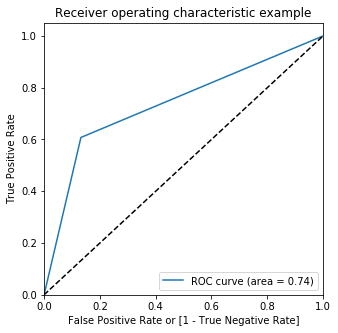

In [87]:
estimator = RandomForestClassifier()

param_grid ={ 'n_estimators': [ 750, 1500],
                                     'max_features': ['auto', 'sqrt', 'log2'],
                                     'max_depth' : [8,11,17],
                                     'criterion' :['gini', 'entropy']
            }
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }
gridsearch = grid_search_wrapper(refit_score='recall_score')

## Final LGBM for all

In [14]:
import lightgbm as lgb

/Users/ekaterina/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for recall_score
{'min_child_weight': 10.0, 'num_leaves': 50, 'reg_alpha': 30, 'reg_lambda': 400}
              precision    recall  f1-score   support

     class_0       0.77      0.86      0.81      3256
     class_1       0.80      0.68      0.74      2690

    accuracy                           0.78      5946
   macro avg       0.78      0.77      0.77      5946
weighted avg       0.78      0.78      0.78      5946


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0          2797           459
class_1           850          1840
Accuracy_score on the test data:
0.7798520013454423
Roc auc on the test data:
0.77152217695898


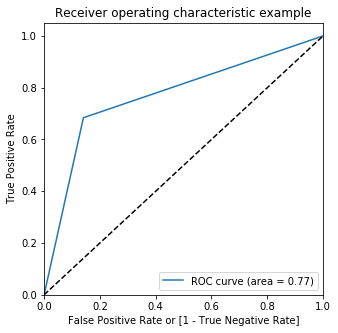

In [101]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [50,40, 55], 
             'min_child_weight': [ 1e-1, 1, 1e1,],
             'reg_alpha' : [0,  5, 10, 20,30],
             'reg_lambda': [0, 200, 300,400,]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

In [79]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 1, reg_lambda=100).fit(X_train, y_train)

In [84]:
recall_score(y_test, model_lgb.predict(X_test))

0.6799256505576208

In [1975]:
importances = model_lgb.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2368]:
full_data.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'churn',
       'change_copies', 'Sales ratio per customer', '# copies per customer',
       'Type activity_Administration', 'Type activity_Collect Information',
       'Type activity_Commercial', 'Type activity_Customer training',
       'Type activity_Implementation', 'Type activity_In-house training',
       'Type activity_Internal', 'Type activity_Others',
       'Type activity_Presentation', 'Type activity_Prospecting',
       'Type activity_Support', 'count_cicle', 'ADMINISTRATION',
       'BIOLOGY AND GEOLOGY', 'ECONOMY', 'ENGLISH (PRIMARY)',
       'FRENCH (PRIMARY)', 'GEOGRAPHY AND HISTORY', 'INFORMATION TECHNOLOGY',
       'LATIN & GREEK', 'LIBRARY', 'MANAGEMENT BOARD', 'MATHEMATICS',
       'MUSIC (PRIMARY)', 'ORIENTATION', 'OTHER', 'OWNERSHIP TEAM',
       'PASTORAL TEAM', 'PHILOS

In [2344]:
sorted([*zip(train.drop('churn', axis =1).columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1])

[('change_copies', 282),
 ('# copies', 267),
 ('Mkt_impact', 165),
 ('Customer heading', 163),
 ('days_dif_course_end', 127),
 ('# copies per customer', 121),
 ('Mkt_actions', 111),
 ('course_end_month', 110),
 ('days_dif_deadline_end', 105),
 ('Course', 104),
 ('count_cicle', 98),
 ('# Mkt_action 1', 98),
 ('Sales ratio per customer', 92),
 ('# Mkt_action 2', 85),
 ('days_dif_deadline_start', 78),
 ('deadline_end_day', 68),
 ('Current Seller id', 67),
 ('Subject', 65),
 ('Latitude', 62),
 ('# Mkt_action 3', 62),
 ('course_end_day', 60),
 ('deadline_start_month', 55),
 ('Town', 53),
 ('deadline_start_day', 53),
 ('action_during_deadline', 51),
 ('deadline_end_month', 48),
 ('visits', 43),
 ('PRIMARY', 40),
 ('OTHER', 33),
 ('Type Current Support', 31),
 ('Titularity', 31),
 ('Current year', 30),
 ('BIOLOGY AND GEOLOGY', 21),
 ('Number_of_Representatives', 20),
 ('Type activity_Commercial', 19),
 ('MANAGEMENT BOARD', 19),
 ('MATHEMATICS', 16),
 ('LIBRARY', 15),
 ('ENGLISH (PRIMARY)', 5)

In [77]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(381, 'change_copies'), (356, '# copies'), (226, '# Mkt_action 1'), (216, 'key'), (179, 'count_cicle'), (174, '# copies per customer'), (161, 'Current year'), (133, 'Course'), (109, '# Mkt_action 2'), (90, 'Customer heading'), (84, 'Current Seller id'), (82, '# Mkt_action 3'), (81, 'Sales ratio per customer'), (63, 'Latitude'), (60, 'INFANT'), (57, 'Town'), (51, 'LIBRARY'), (49, 'OTHER'), (44, 'PRIMARY'), (39, 'total_visits'), (38, 'MANAGEMENT BOARD'), (32, 'Subject'), (32, 'RELIGION (SECONDARY)'), (24, 'Type Current Support'), (24, 'MATHEMATICS'), (22, 'Type activity_Commercial'), (22, 'Numer_of_Representatives'), (18, 'GEOGRAPHY AND HISTORY'), (18, 'BIOLOGY AND GEOLOGY'), (16, 'Titularity'), (14, 'MUSIC (PRIMARY)'), (14, 'ENGLISH (PRIMARY)'), (13, 'UNALLOCATED'), (9, 'FRENCH (SECONDARY)'), (8, 'ADMINISTRATION'), (7, 'PHILOSOPHY'), (5, 'Type activity_Support'), (5, 'TECHNOLOGY'), (5, 'RELIGION (PRIMARY)'), (4, 'SPANISH LANGUAGE'), (4, 'RELIGION (INFANT)'), 

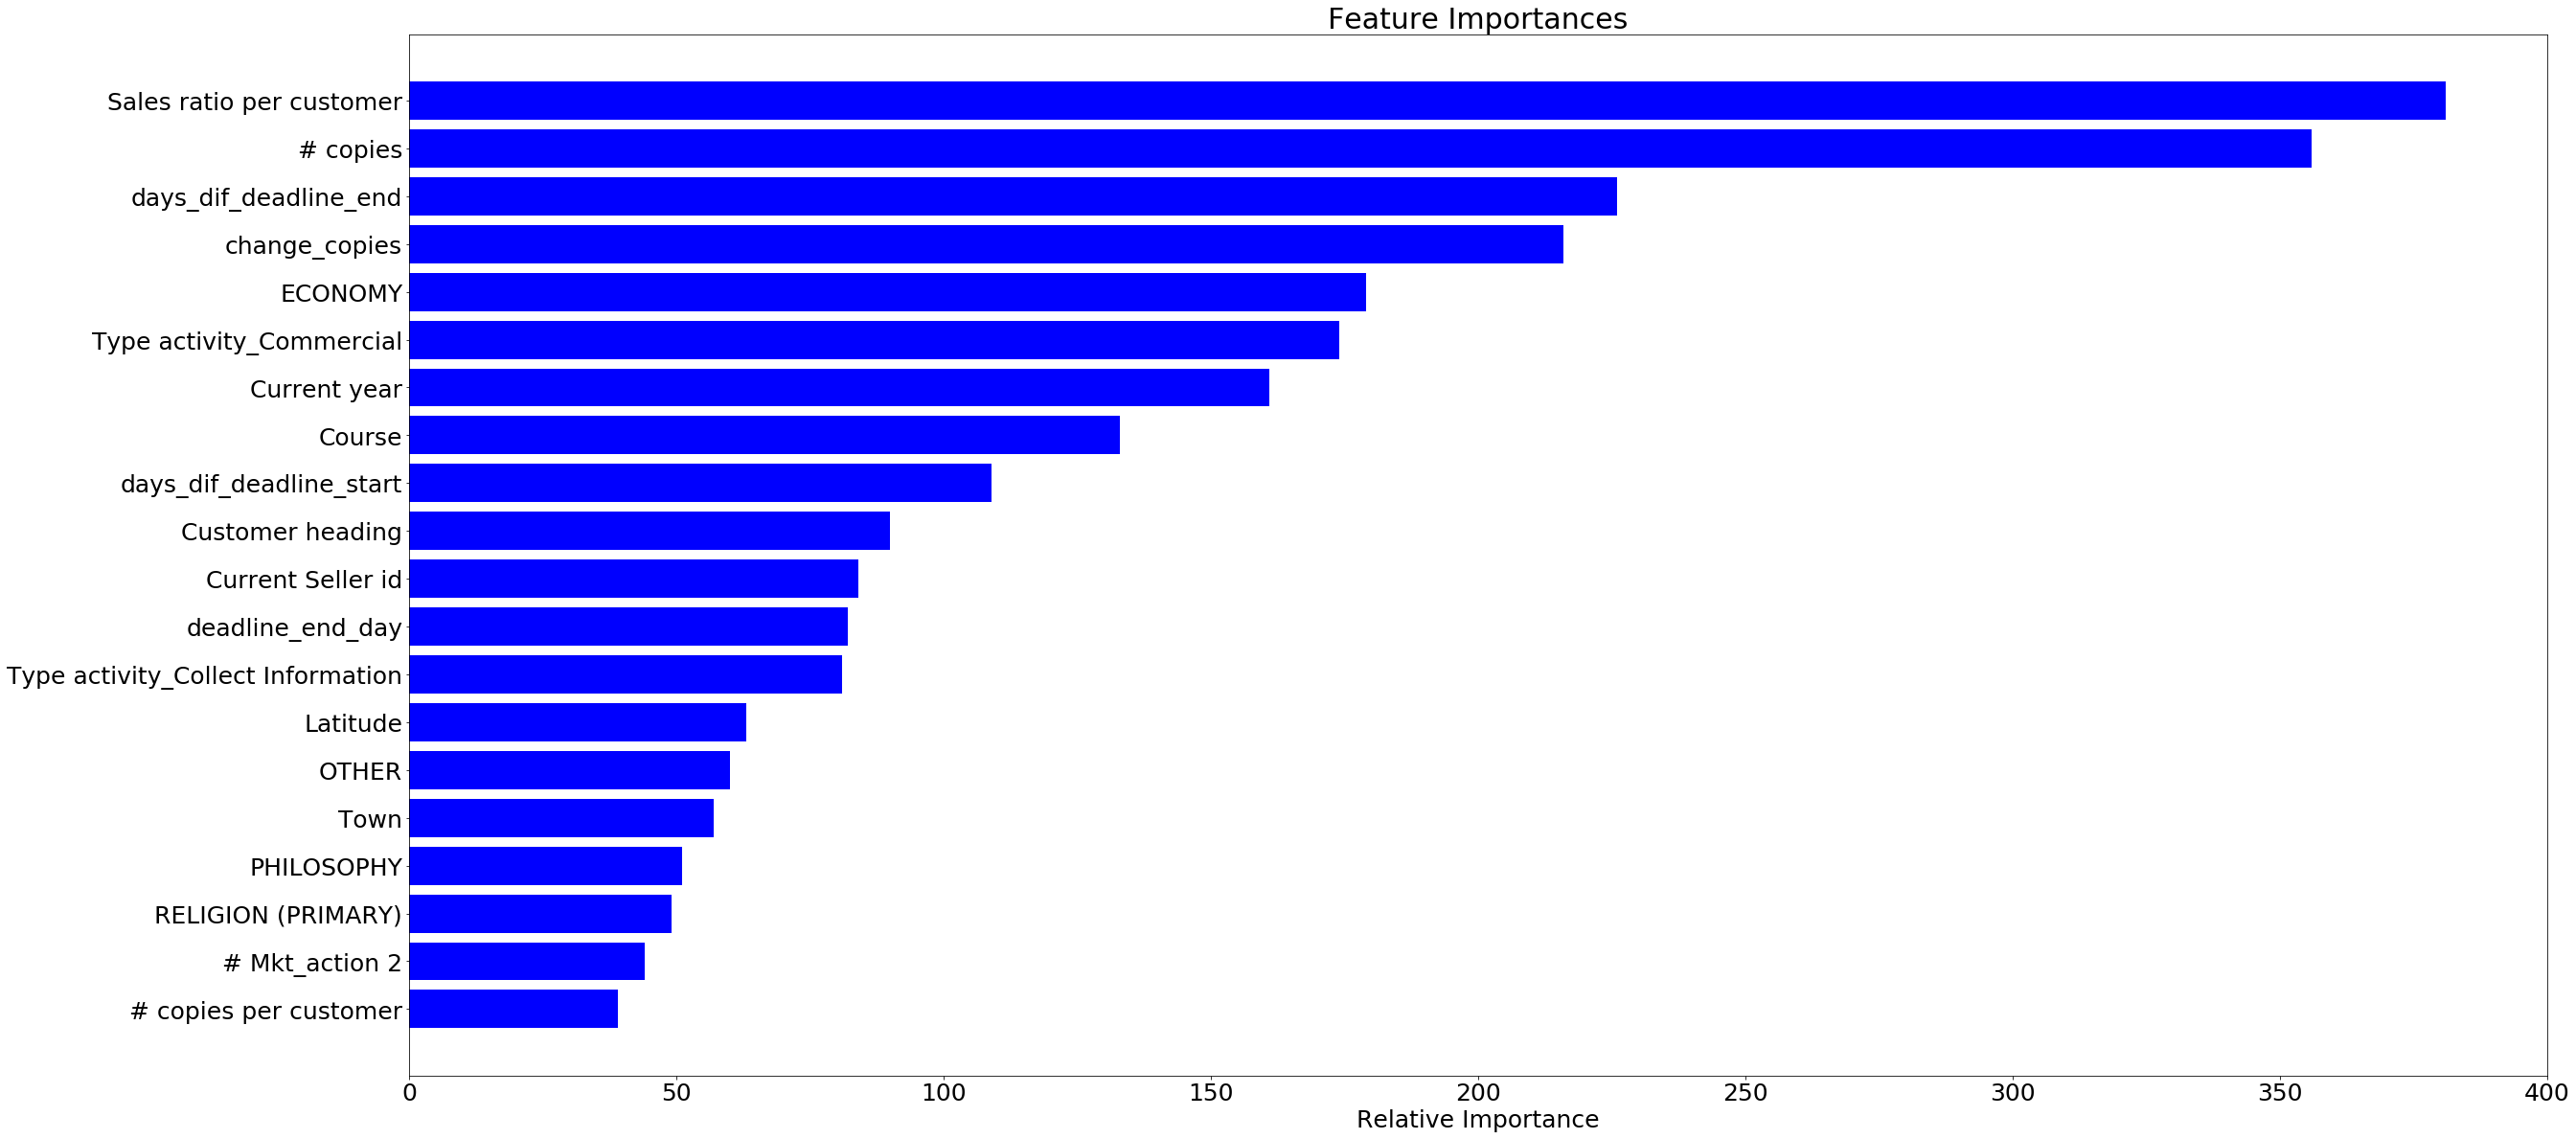

In [128]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams.update({'font.size': 30})
plt.show()

# XGBoost

In [121]:
full_data = full_data.drop("change_copies", axis = 1)

In [107]:
import xgboost as xgb

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for recall_score
{'colsample_bytree': 1.0, 'gamma': 0.3, 'max_depth': 5, 'min_child_weight': 7, 'subsample': 0.6}
              precision    recall  f1-score   support

     class_0       0.55      0.97      0.70      3256
     class_1       0.55      0.04      0.08      2690

    accuracy                           0.55      5946
   macro avg       0.55      0.51      0.39      5946
weighted avg       0.55      0.55      0.42      5946


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0          3163            93
class_1          2578           112
Accuracy_score on the test data:
0.5507904473595695
Roc auc on the test data:
0.5065365170848443


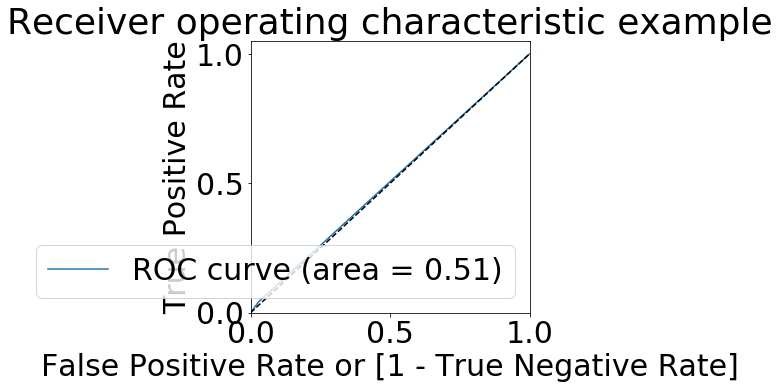

In [143]:
estimator = xgb.XGBClassifier()
param_grid = {
        'min_child_weight': [7,10,15],
        'gamma': [0.3,0.5, 0.7],
        'subsample': [0.6 ,0.8],
        'colsample_bytree': [0.8,1.0],
        'max_depth': [3, 5]
        }

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

In [140]:
model_xgb =xgb.XGBClassifier(colsample_bytree= 1.0, gamma= 0.3, max_depth= 3, min_child_weight=10, subsample= 0.6).fit(X_train, y_train)

In [144]:
print ("Sorted Feature Importance:")
importances = model_xgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(0.043371238, 'Current year'), (0.031722225, 'Customer heading'), (0.030154217, 'BIOLOGY AND GEOLOGY'), (0.029704334, 'deadline_end_day'), (0.028290302, 'count_cicle'), (0.02693788, 'Titularity'), (0.026510099, '# Mkt_action 1'), (0.026318489, 'Latitude'), (0.024357526, 'ENGLISH (PRIMARY)'), (0.024138363, 'Mkt_impact'), (0.02412296, 'Type Current Support'), (0.022941656, 'MATHEMATICS'), (0.022310406, 'deadline_end_month'), (0.022266084, 'Town'), (0.022174254, 'action_during_deadline'), (0.02166538, 'Course'), (0.021585492, 'course_end_month'), (0.021319557, 'MUSIC (PRIMARY)'), (0.021205094, 'Number_of_Representatives'), (0.02088838, 'deadline_start_day'), (0.020719491, 'deadline_start_month'), (0.02061495, 'Subject'), (0.020528924, 'MANAGEMENT BOARD'), (0.020332603, 'days_dif_deadline_end'), (0.019908605, '# copies per customer'), (0.019888625, 'visits'), (0.0196939, 'days_dif_course_end'), (0.019384222, 'Current Seller id'), (0.019323563, 'Mkt_actions'), (0

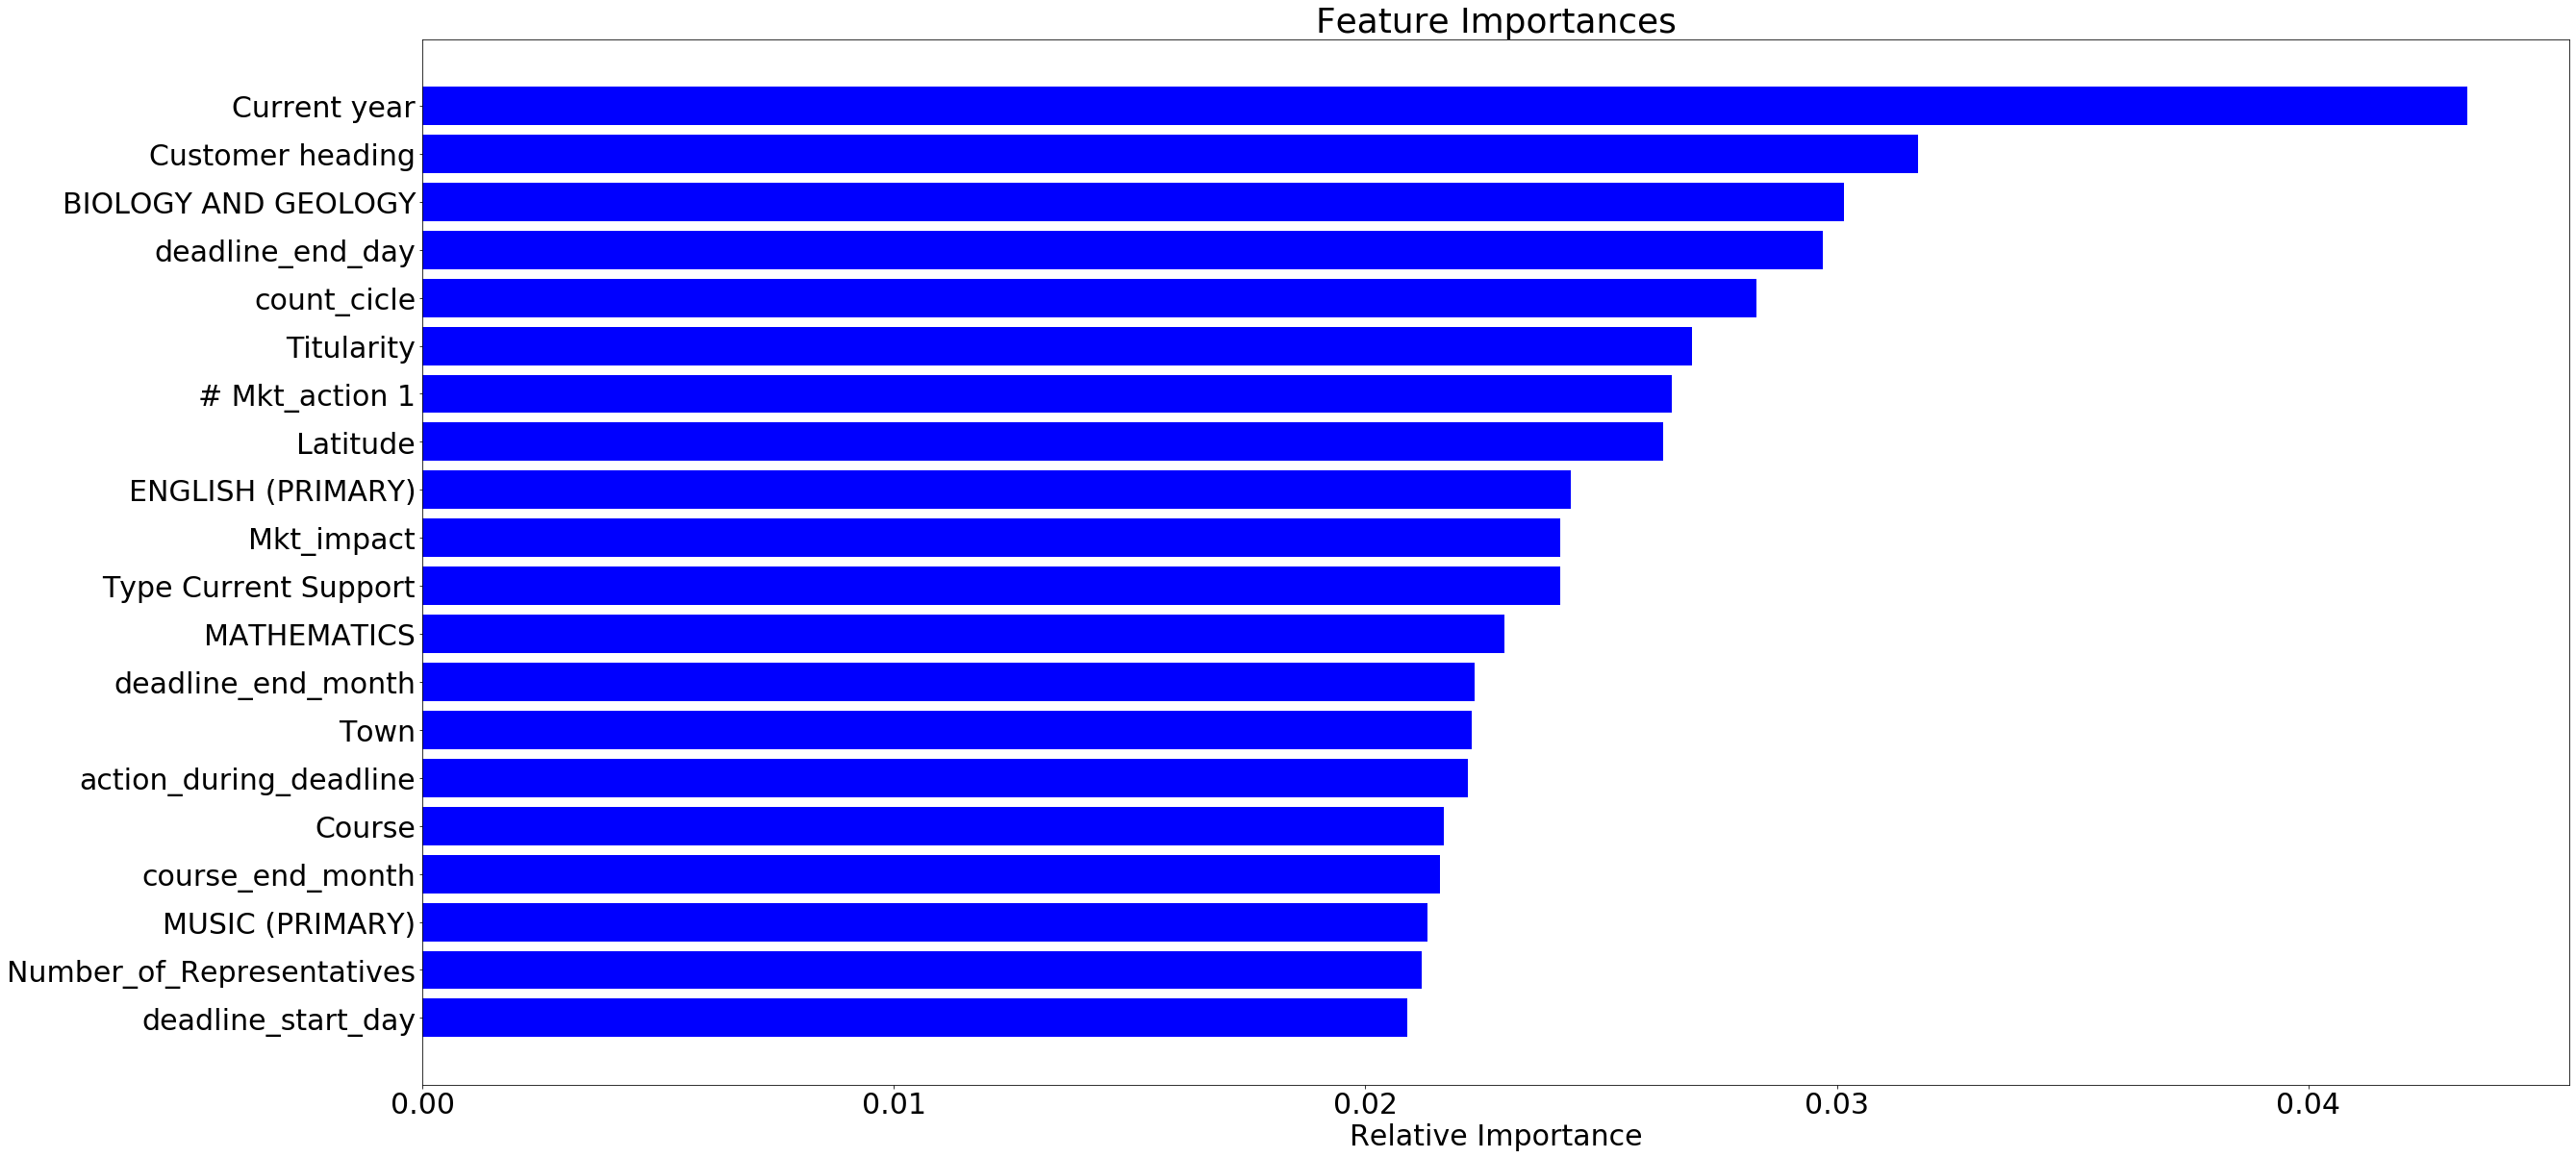

In [145]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams.update({'font.size': 30})
plt.show()

## SVM

In [116]:
from sklearn.svm import SVC

In [117]:
train.shape

(19696, 75)

In [118]:
test.shape

(5946, 75)

In [119]:
estimator = SVC()
param_grid = { 'C' : [0.01, 0.1, 1, 10],
              'gamma' : [ 0.01, 0.1, 1],
             'kernel':['rbf','linear','poly','sigmoid'],
             'class_weight':['balanced']
            }
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


KeyboardInterrupt: 

## Modelling per each subject

In [2155]:
#full_data.to_csv("Full_data_12_26.csv", index = False)

In [1978]:
full_data['Subject'].unique()

[60, 65, 79, 54, 15, 13]
Categories (6, int64): [60, 65, 79, 54, 15, 13]

In [1993]:
subj_60 = full_data[full_data['Subject'] == 60]
subj_65 = full_data[full_data['Subject'] == 65]
subj_79 = full_data[full_data['Subject'] == 79]
subj_54 = full_data[full_data['Subject'] == 54]
subj_15 = full_data[full_data['Subject'] == 15]
subj_13 = full_data[full_data['Subject'] == 13]

# Subject 60

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2374]:
data_wthout_activities = pd.read_csv("/Users/ekaterina/Desktop/ie/Datathon 2/Data sets/Full_data_12_26.csv")

In [2347]:
train = subj_60[(subj_60['Current year'] == 2015) |(subj_60['Current year'] == 2016) | (subj_60['Current year'] == 2017)]
test = subj_60[(subj_60['Current year'] == 2018)]

In [2348]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [ ]:
X_train.shape

In [2351]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='f1_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for f1_score
{'min_child_weight': 10.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 10}
              precision    recall  f1-score   support

     class_0       0.71      0.86      0.78       760
     class_1       0.79      0.59      0.67       647

    accuracy                           0.74      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.75      0.74      0.73      1407


Confusion matrix optimized for f1_score on the test data:
         pred_class_0  pred_class_1
class_0           657           103
class_1           268           379
Accuracy_score on the test data:
0.736318407960199
0.7251271048564223


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   31.1s finished


In [2034]:
import lightgbm as lgb

In [2015]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=10).fit(X_train, y_train)

In [2039]:
list(X_train)

[array([ 0.46311569,  0.97382229,  2.85787971,  0.13781993,  0.23435522,
         0.84115319,  0.84115319,  0.97014082, -0.28908864, -1.30992455,
        -0.68486836,  0.52693446,  0.14520907,  0.07048992,  2.5187276 ,
         0.0256579 ,  0.        ,  0.15648566,  0.        ,  0.04917432,
         0.        ,  0.0256579 ,  0.        ,  0.        ,  0.        ,
         0.09044546, -0.48340767, -0.10686711, -0.12569185, -0.07790532,
        -0.13762862, -0.01481035, -0.11439926, -0.0894159 , -0.05263852,
        -0.15649956, -0.3610697 , -0.15323009, -0.09782391,  0.        ,
        -0.23995656,  0.        , -0.0370472 , -0.06151509, -0.1167297 ,
        -0.08537913, -0.34648478, -0.02963044,  0.        , -0.15853428,
        -0.11929552, -0.13401006, -0.06722064, -0.04069286,  5.17597339,
         6.06827739,  4.97734717,  0.26976081]),
 array([ 1.05942818,  0.97382229,  3.11651585,  0.13781993,  0.23435522,
         0.84115319,  0.84115319,  0.97014082, -0.28908864, -1.30992455,
  

In [2041]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(230, 'change_copies'), (154, '# copies'), (120, '# Mkt_action 1'), (115, 'Sales ratio per customer'), (94, 'count_cicle'), (81, 'Customer heading'), (78, '# Mkt_action 3'), (68, '# copies per customer'), (60, '# Mkt_action 2'), (51, 'Latitude'), (37, 'Current year'), (37, 'Current Seller id'), (30, 'Town'), (27, 'Course'), (15, 'Titularity'), (11, 'Numer_of_Representatives'), (4, 'PRIMARY'), (2, 'Institution'), (2, 'BIOLOGY AND GEOLOGY'), (1, 'OTHER'), (1, 'MANAGEMENT BOARD'), (0, 'total_visits_2015'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Commercial'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SP

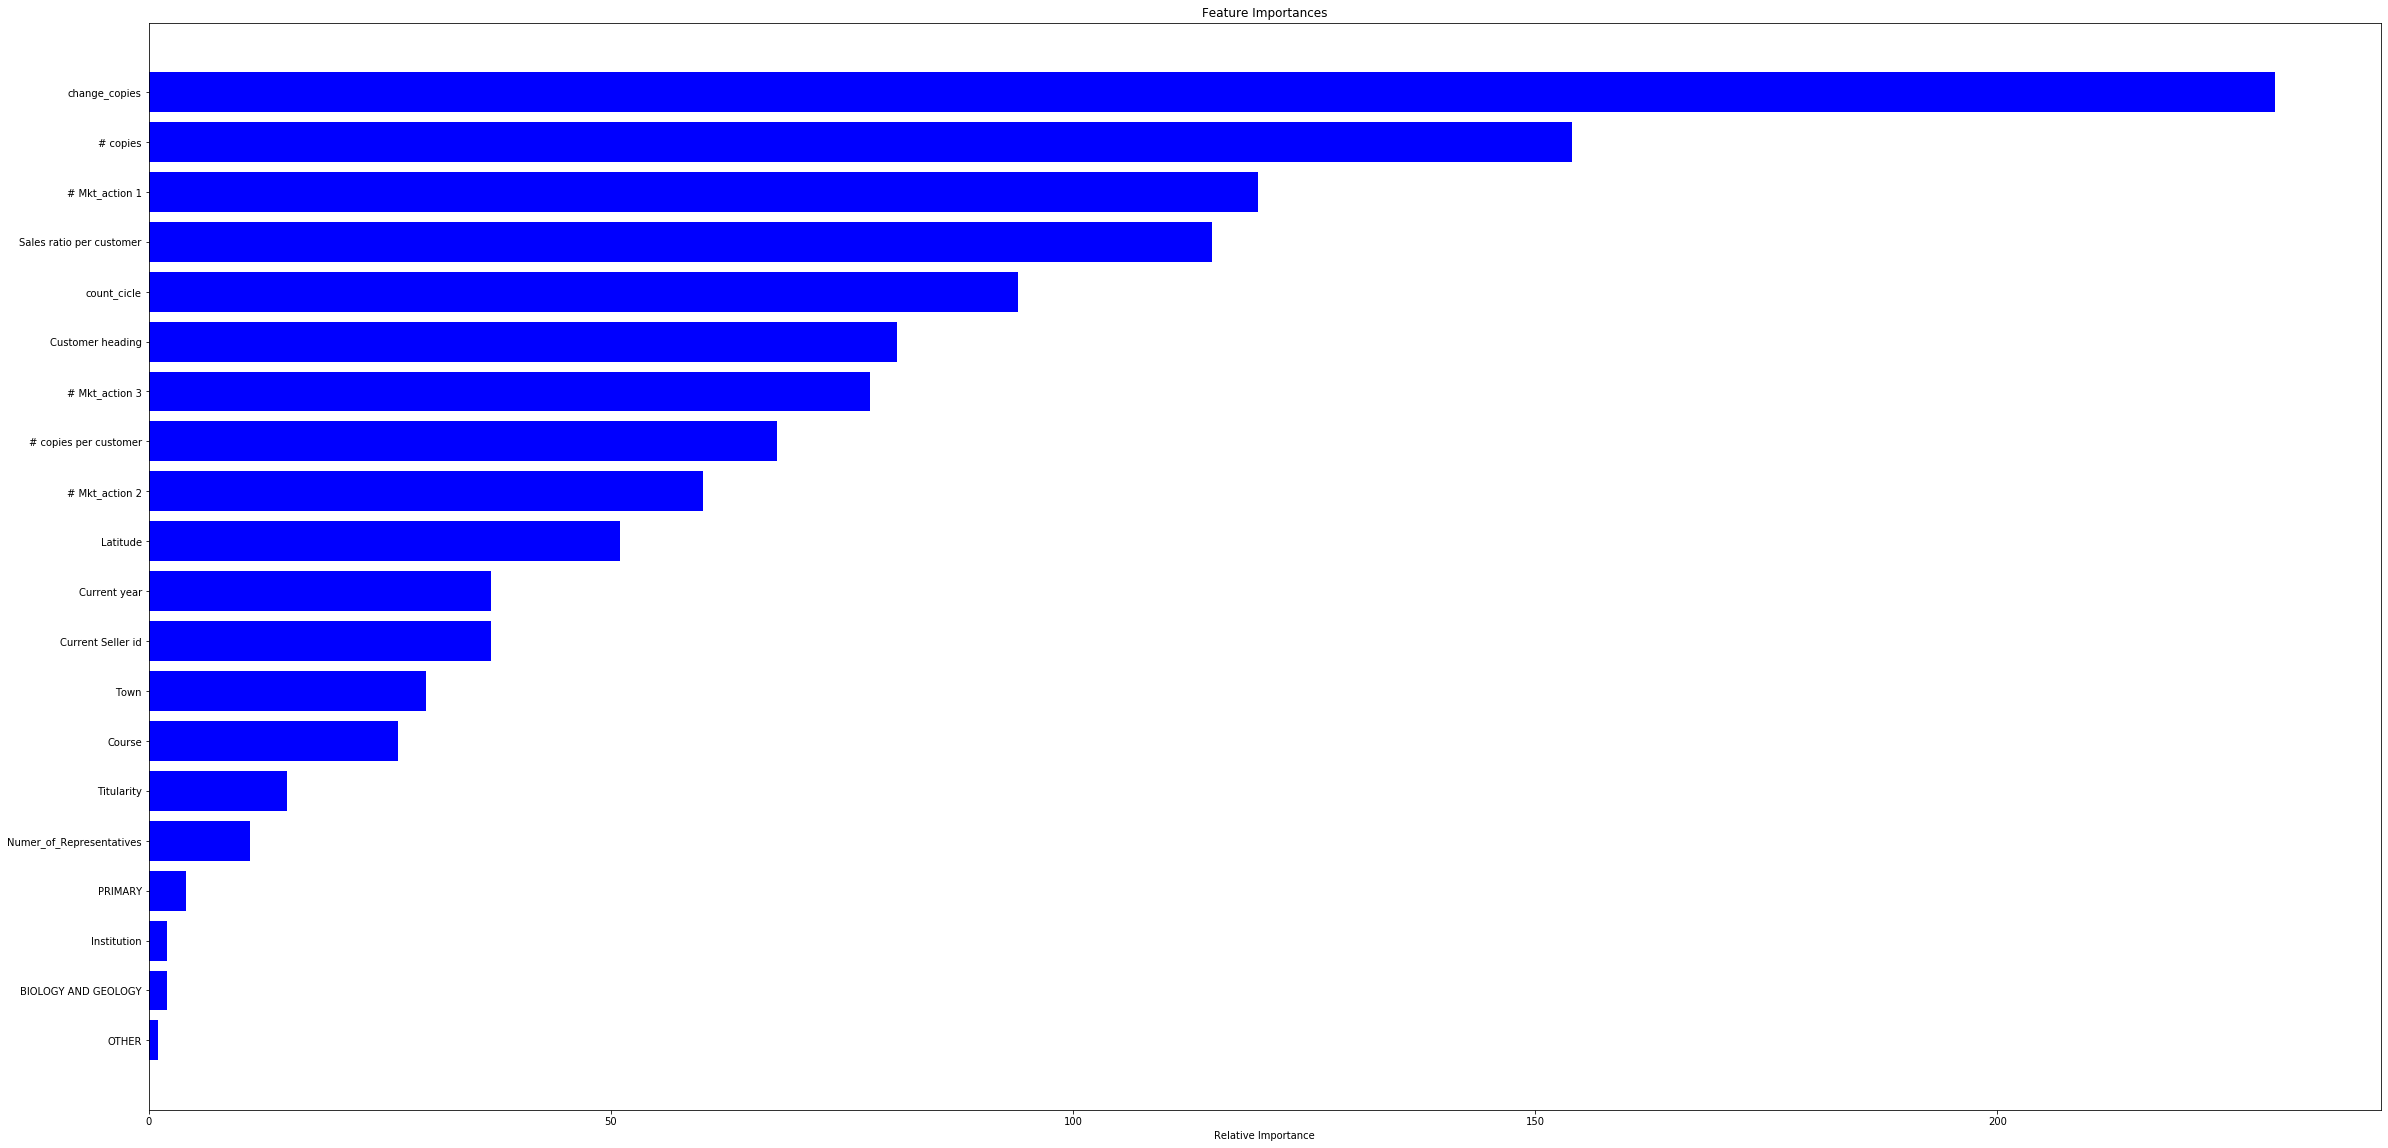

In [2045]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Random Forest subj  60

In [2369]:
estimator = RandomForestClassifier()

param_grid ={ 'n_estimators': [200, 500],
                                     'max_features': ['auto', 'sqrt', 'log2'],
                                     'max_depth' : [4,5,6,7,8],
                                     'criterion' :['gini', 'entropy']
            }
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }
gridsearch = grid_search_wrapper(refit_score='recall_score')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for recall_score
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
              precision    recall  f1-score   support

     class_0       0.76      0.88      0.81       568
     class_1       0.76      0.58      0.66       384

    accuracy                           0.76       952
   macro avg       0.76      0.73      0.74       952
weighted avg       0.76      0.76      0.75       952


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0           499            69
class_1           160           224
Accuracy_score on the test data:
0.759453781512605


In [2371]:
estimator = LogisticRegression()
param_grid ={
    'C': np.logspace(0, 100, 5),
    'penalty': ["l1", 'l2'],
    'random_state': [42,901,921,21]
   
}
scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score), 
         'auc': make_scorer(auc)}
gridsearch = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s


ValueError: x is neither increasing nor decreasing : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1].

# Subject 65

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2352]:
train = subj_65[(subj_65['Current year'] == 2015) |(subj_65['Current year'] == 2016) | (subj_65['Current year'] == 2017)]
test = subj_65[(subj_65['Current year'] == 2018)]

In [2353]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2354]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='recall_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1003s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 388 ta

Best params for recall_score
{'min_child_weight': 1, 'num_leaves': 31, 'reg_alpha': 0.1, 'reg_lambda': 1}
              precision    recall  f1-score   support

     class_0       0.79      0.83      0.81       173
     class_1       0.76      0.72      0.74       130

    accuracy                           0.78       303
   macro avg       0.78      0.77      0.77       303
weighted avg       0.78      0.78      0.78       303


Confusion matrix optimized for recall_score on the test data:
         pred_class_0  pred_class_1
class_0           143            30
class_1            37            93
Accuracy_score on the test data:
0.7788778877887789
0.770987105380169


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:    9.5s finished


In [2034]:
import lightgbm as lgb

In [2127]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 5, reg_lambda= 0.1).fit(X_train, y_train)

In [2128]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(150, 'change_copies'), (105, '# copies'), (103, 'Customer heading'), (97, 'Sales ratio per customer'), (84, '# copies per customer'), (30, 'count_cicle'), (29, '# Mkt_action 2'), (26, 'Numer_of_Representatives'), (12, '# Mkt_action 1'), (10, '# Mkt_action 3'), (9, 'Titularity'), (6, 'Current Seller id'), (4, 'Town'), (2, 'MATHEMATICS'), (1, 'total_visits_2015'), (1, 'OTHER'), (1, 'Current year'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Commercial'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SPANISH LANGUAGE'), (0, 'SCIENCE'), (0, 'RELIGION (PRIMARY)'), (0, 'REGIONAL LANGUAGE'), (0, 'QUALITY'), (0, '

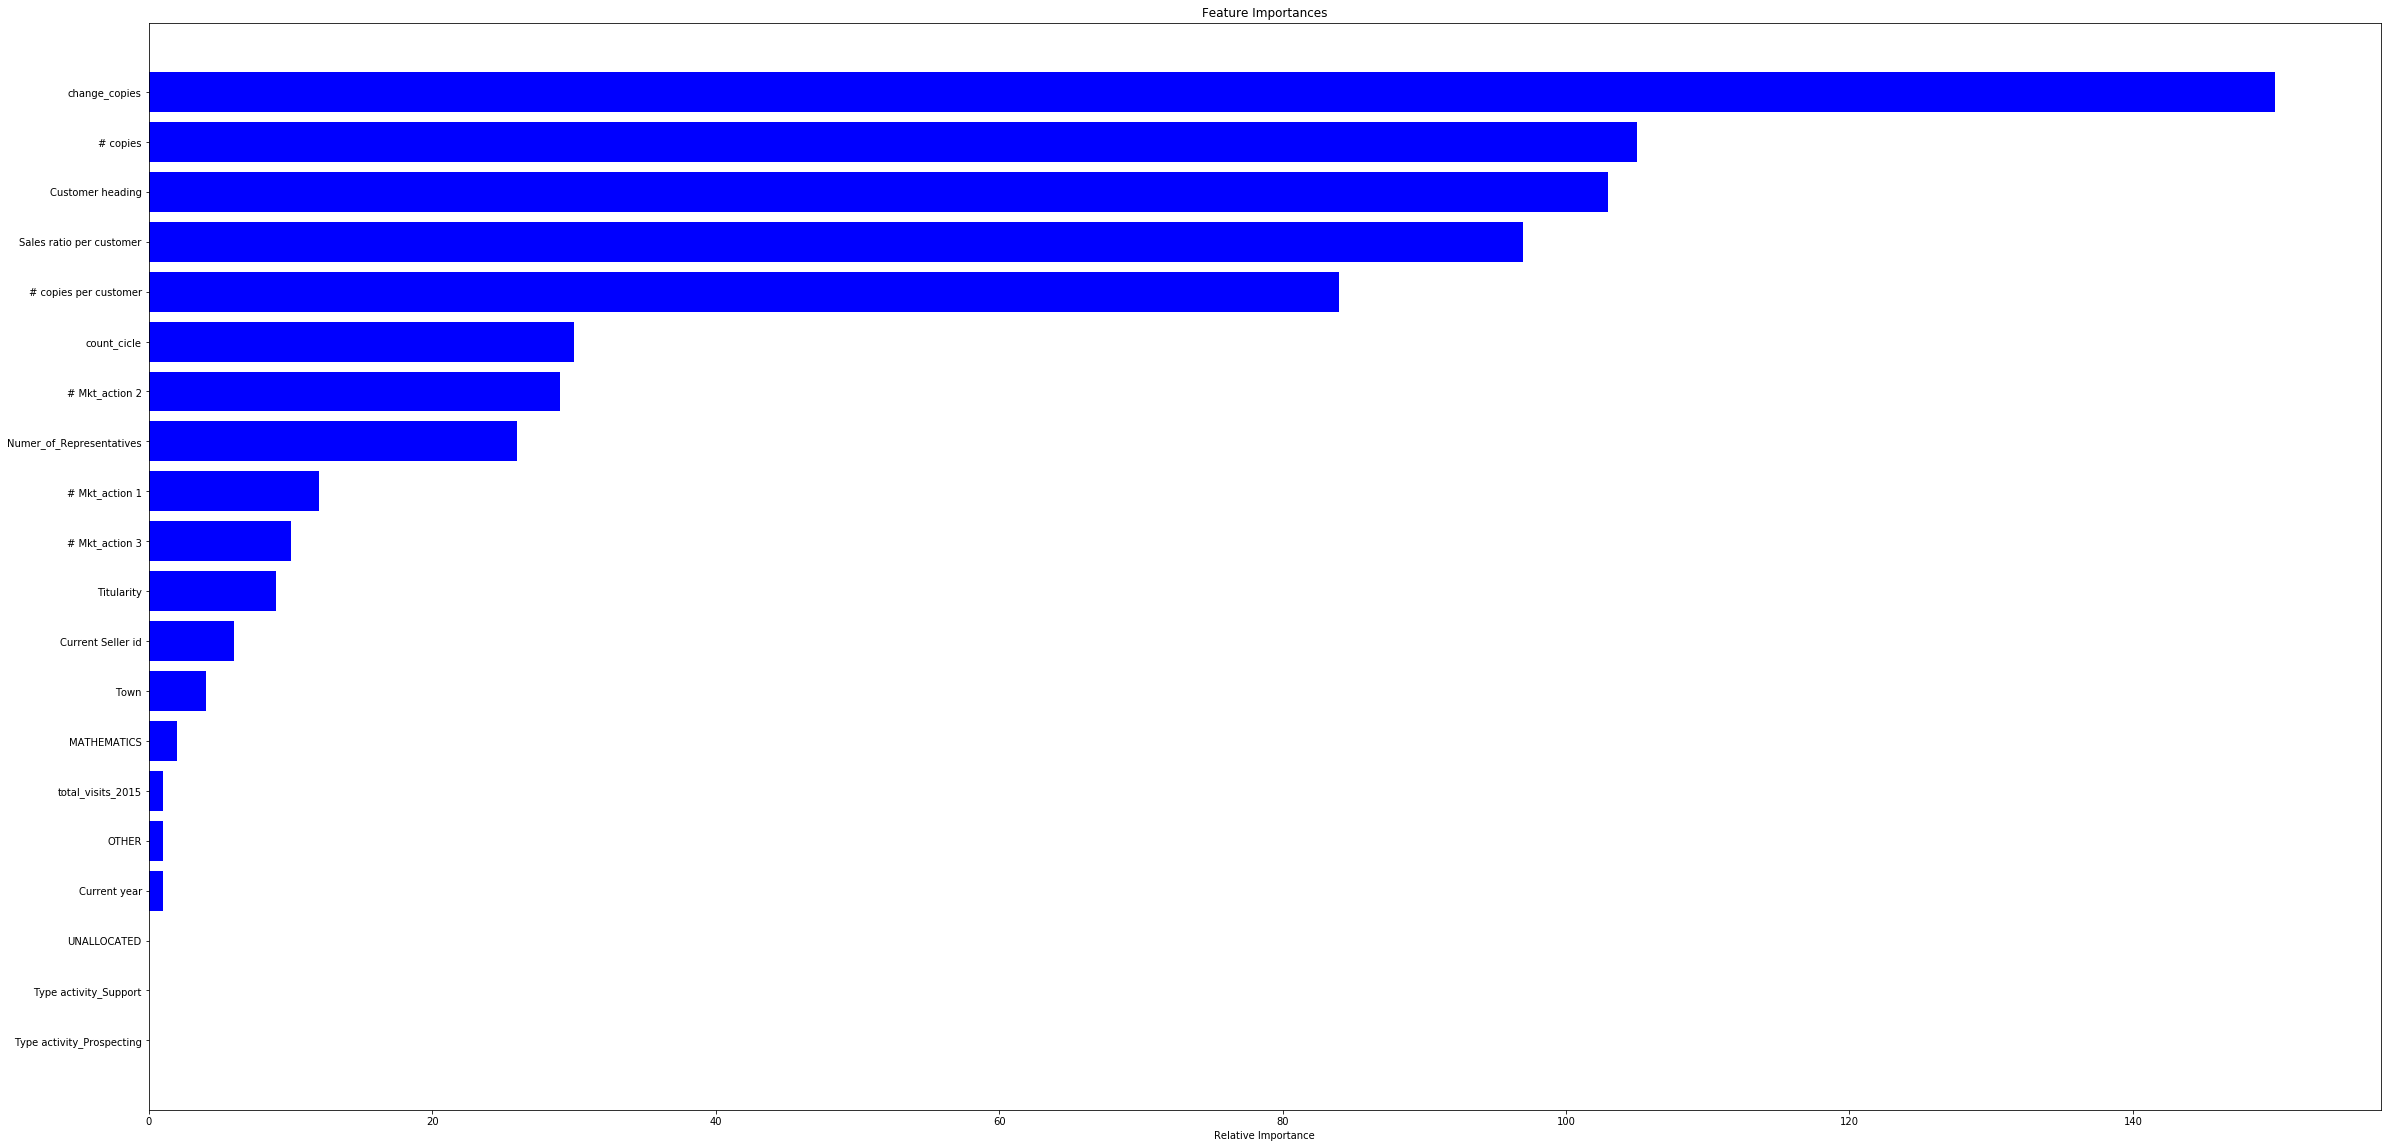

In [2129]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 79

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2355]:
train = subj_79[(subj_79['Current year'] == 2015) |(subj_79['Current year'] == 2016) | (subj_79['Current year'] == 2017)]
test = subj_79[(subj_79['Current year'] == 2018)]

In [2356]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2357]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 10.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 100}
              precision    recall  f1-score   support

     class_0       0.79      0.87      0.83       568
     class_1       0.77      0.65      0.71       384

    accuracy                           0.78       952
   macro avg       0.78      0.76      0.77       952
weighted avg       0.78      0.78      0.78       952


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           495            73
class_1           133           251
Accuracy_score on the test data:
0.7836134453781513
0.7625623532863851


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   26.2s finished


In [2034]:
import lightgbm as lgb

In [2134]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=100).fit(X_train, y_train)

In [2135]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(269, 'change_copies'), (218, '# copies'), (188, 'Customer heading'), (123, 'count_cicle'), (107, '# copies per customer'), (78, '# Mkt_action 1'), (51, '# Mkt_action 2'), (40, '# Mkt_action 3'), (33, 'Sales ratio per customer'), (29, 'Town'), (17, 'total_visits_2015'), (9, 'Course'), (5, 'MATHEMATICS'), (5, 'Current year'), (3, 'Titularity'), (3, 'Numer_of_Representatives'), (3, 'LIBRARY'), (2, 'Institution'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Commercial'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SPANISH LANGUAGE'), (0, 'SCIENCE'), (0, 'RELIGION (PRIMARY)'), (0, 'REGIONAL LANGUAGE'), (0, 'QU

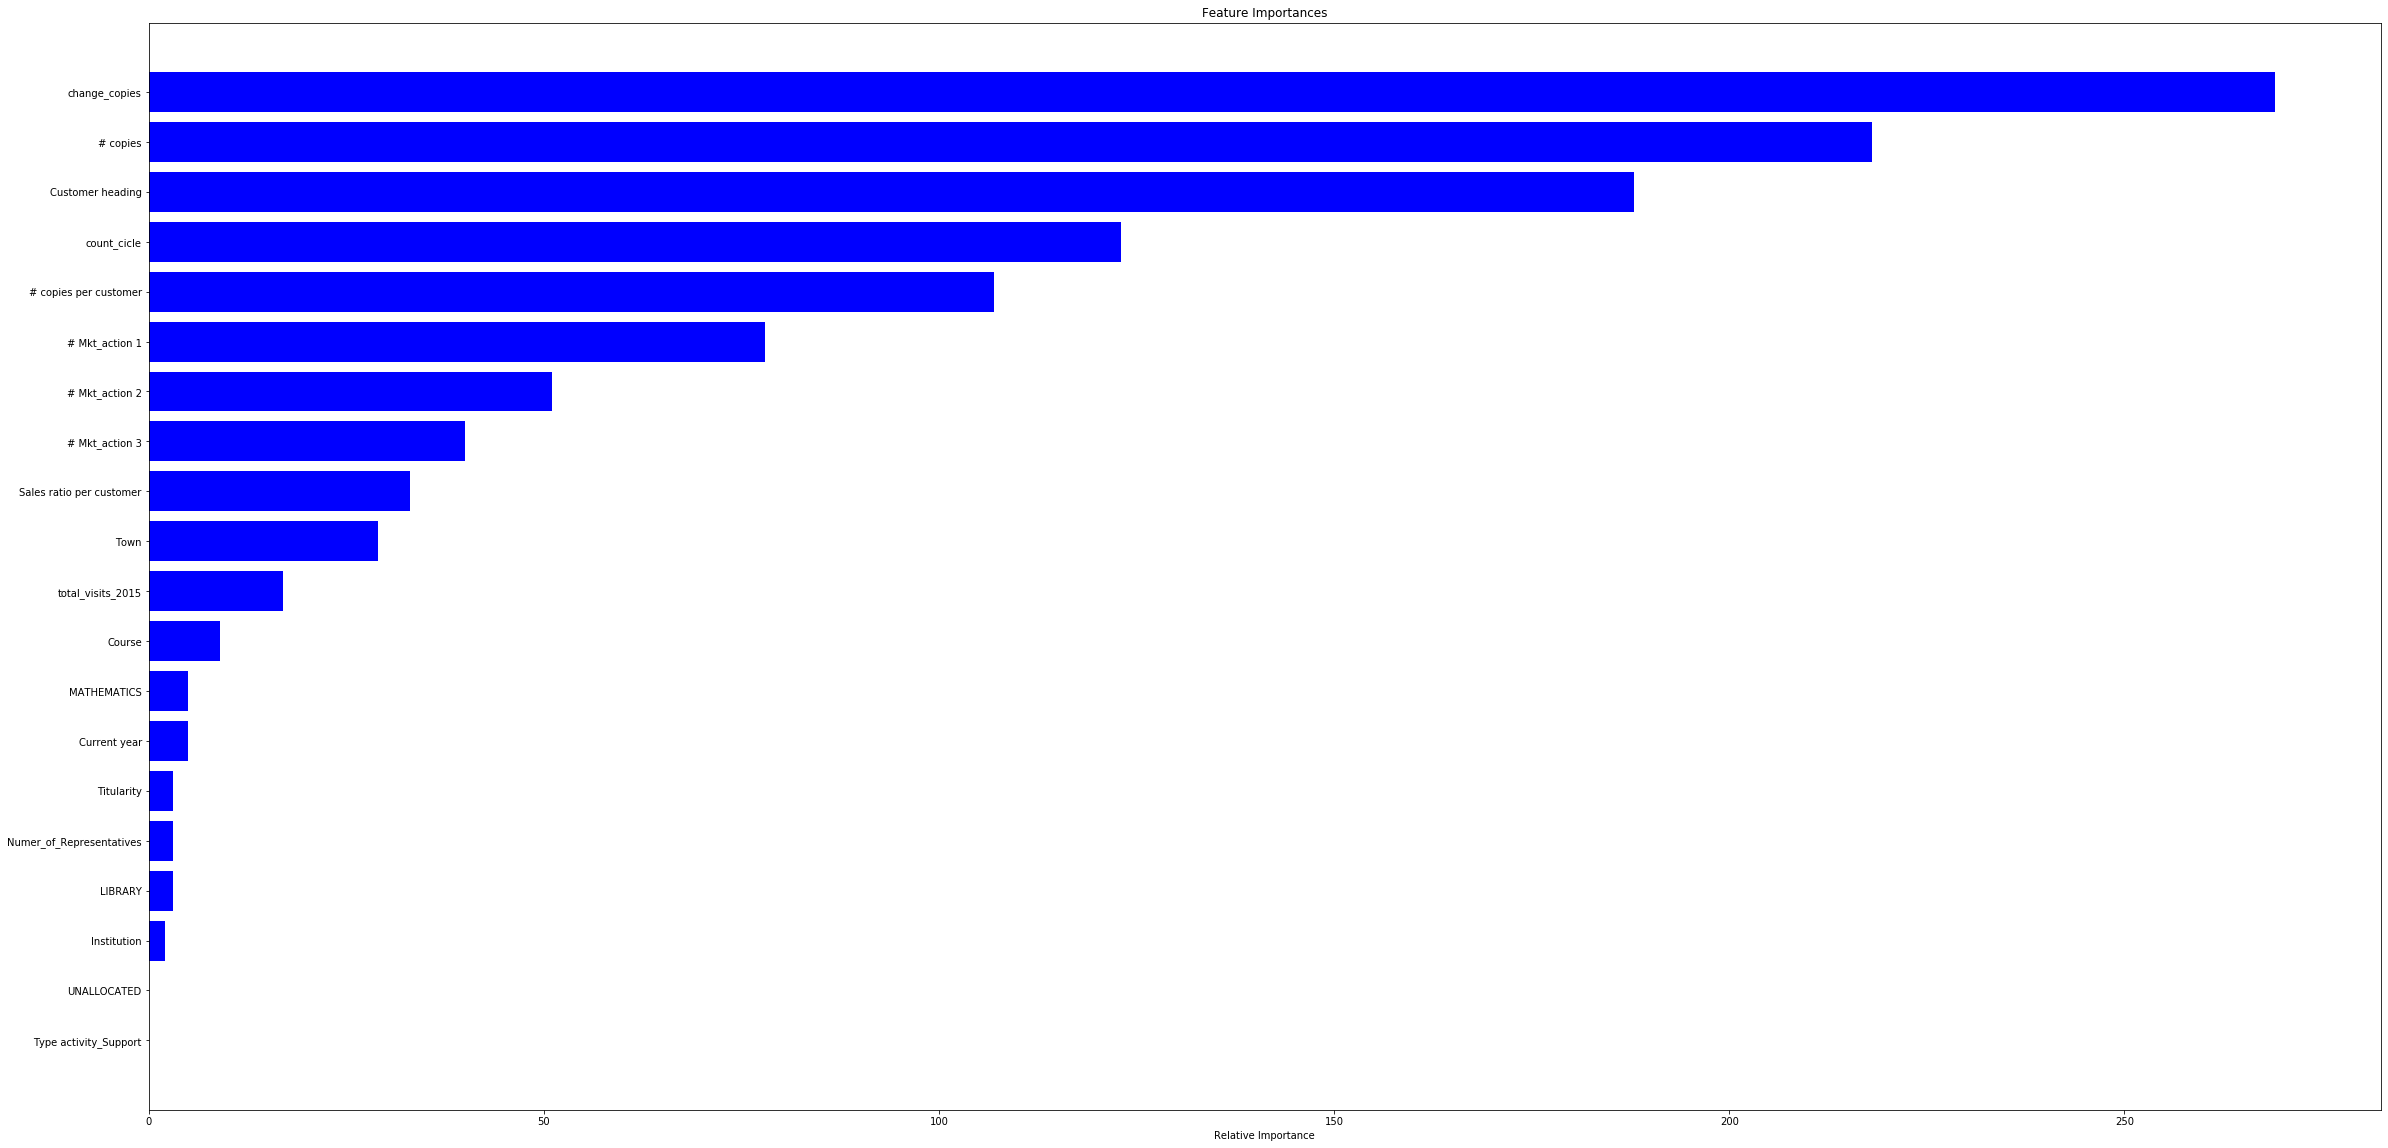

In [2136]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 54

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2137]:
train = subj_54[(subj_54['Current year'] == 2015) |(subj_54['Current year'] == 2016) | (subj_54['Current year'] == 2017)]
test = subj_54[(subj_54['Current year'] == 2018)]

In [2138]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2139]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 10.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 0.1}
              precision    recall  f1-score   support

     class_0       0.75      0.85      0.80       796
     class_1       0.80      0.67      0.73       696

    accuracy                           0.77      1492
   macro avg       0.77      0.76      0.76      1492
weighted avg       0.77      0.77      0.76      1492


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           676           120
class_1           228           468
Accuracy_score on the test data:
0.7667560321715817


In [2034]:
import lightgbm as lgb

In [2140]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=0.1).fit(X_train, y_train)

In [2141]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(229, 'change_copies'), (183, '# Mkt_action 1'), (148, '# copies'), (97, '# copies per customer'), (74, '# Mkt_action 2'), (62, 'count_cicle'), (59, 'Course'), (52, 'Latitude'), (48, '# Mkt_action 3'), (43, 'Customer heading'), (42, 'Sales ratio per customer'), (42, 'Current Seller id'), (10, 'Titularity'), (9, 'Town'), (6, 'PRIMARY'), (4, 'Institution'), (4, 'Current year'), (3, 'MANAGEMENT BOARD'), (3, 'LIBRARY'), (2, 'Type activity_Commercial'), (2, 'OTHER'), (1, 'MATHEMATICS'), (1, 'ENGLISH (PRIMARY)'), (0, 'total_visits_2015'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SPANI

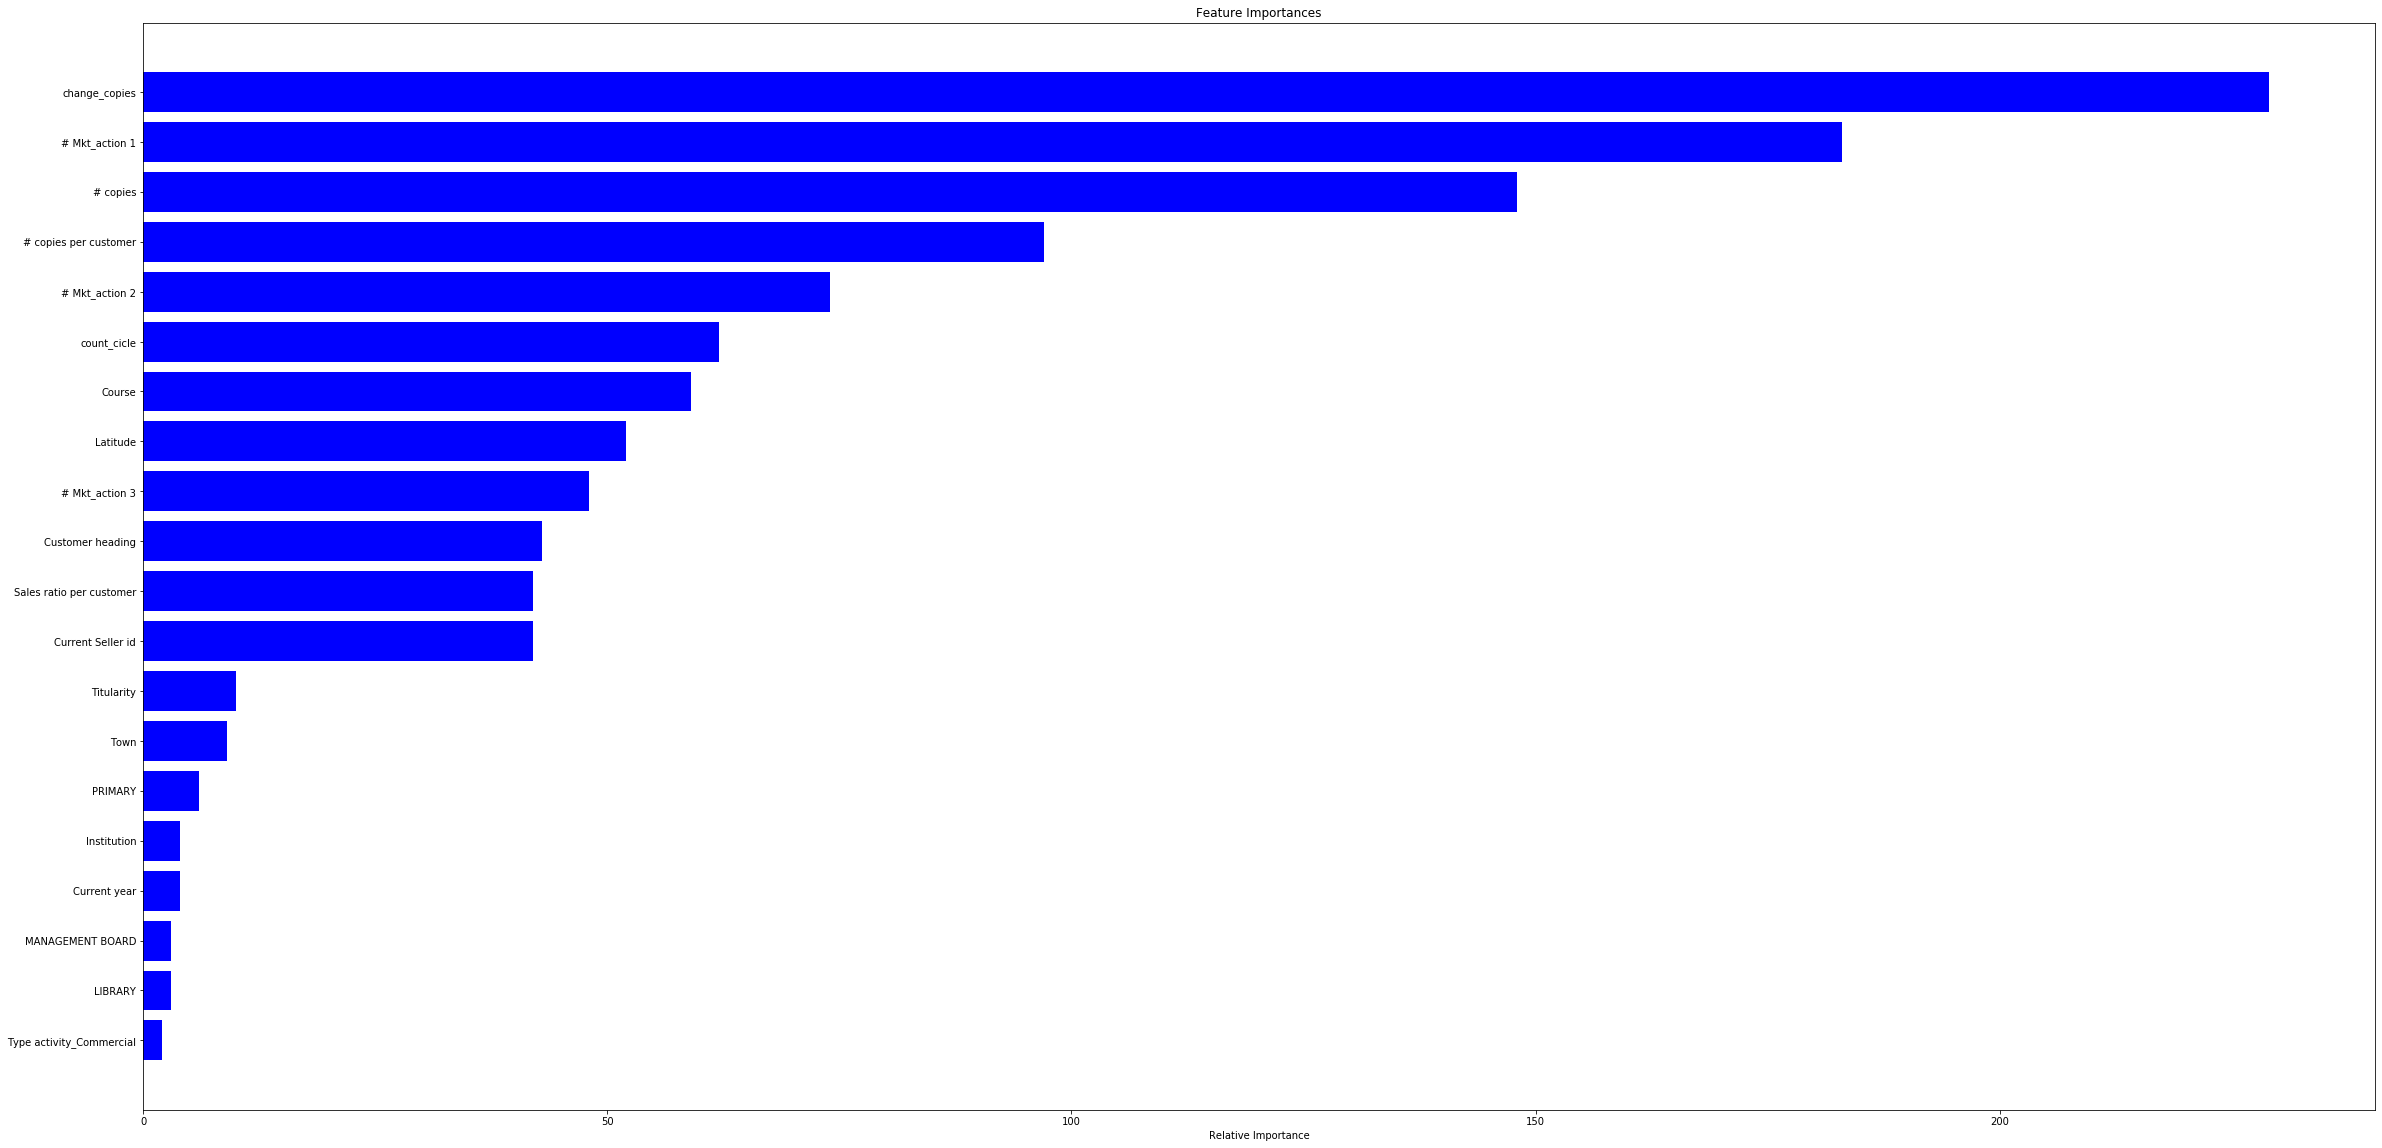

In [2142]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 15

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2143]:
train = subj_15[(subj_15['Current year'] == 2015) |(subj_15['Current year'] == 2016) | (subj_15['Current year'] == 2017)]
test = subj_15[(subj_15['Current year'] == 2018)]

In [2144]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2145]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 10.0, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 10}
              precision    recall  f1-score   support

     class_0       0.73      0.86      0.79       534
     class_1       0.78      0.62      0.69       443

    accuracy                           0.75       977
   macro avg       0.76      0.74      0.74       977
weighted avg       0.75      0.75      0.74       977


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           458            76
class_1           169           274
Accuracy_score on the test data:
0.7492323439099283


In [2034]:
import lightgbm as lgb

In [2146]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 10.0, num_leaves= 31, reg_alpha= 10, reg_lambda=10).fit(X_train, y_train)

In [2147]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(192, 'change_copies'), (140, '# copies'), (101, 'Customer heading'), (64, '# Mkt_action 1'), (63, 'Current year'), (55, '# copies per customer'), (51, '# Mkt_action 2'), (27, 'count_cicle'), (22, 'Course'), (19, 'Titularity'), (15, 'Sales ratio per customer'), (10, 'Current Seller id'), (9, 'PRIMARY'), (9, '# Mkt_action 3'), (8, 'Latitude'), (3, 'MANAGEMENT BOARD'), (2, 'Town'), (2, 'MATHEMATICS'), (1, 'Type activity_Commercial'), (1, 'BIOLOGY AND GEOLOGY'), (0, 'total_visits_2015'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'TECHNOLOGY'), (0, 'SPANISH LANGUAGE'), (0, 'SCIENCE'), (0, 'RELIGION (PRI

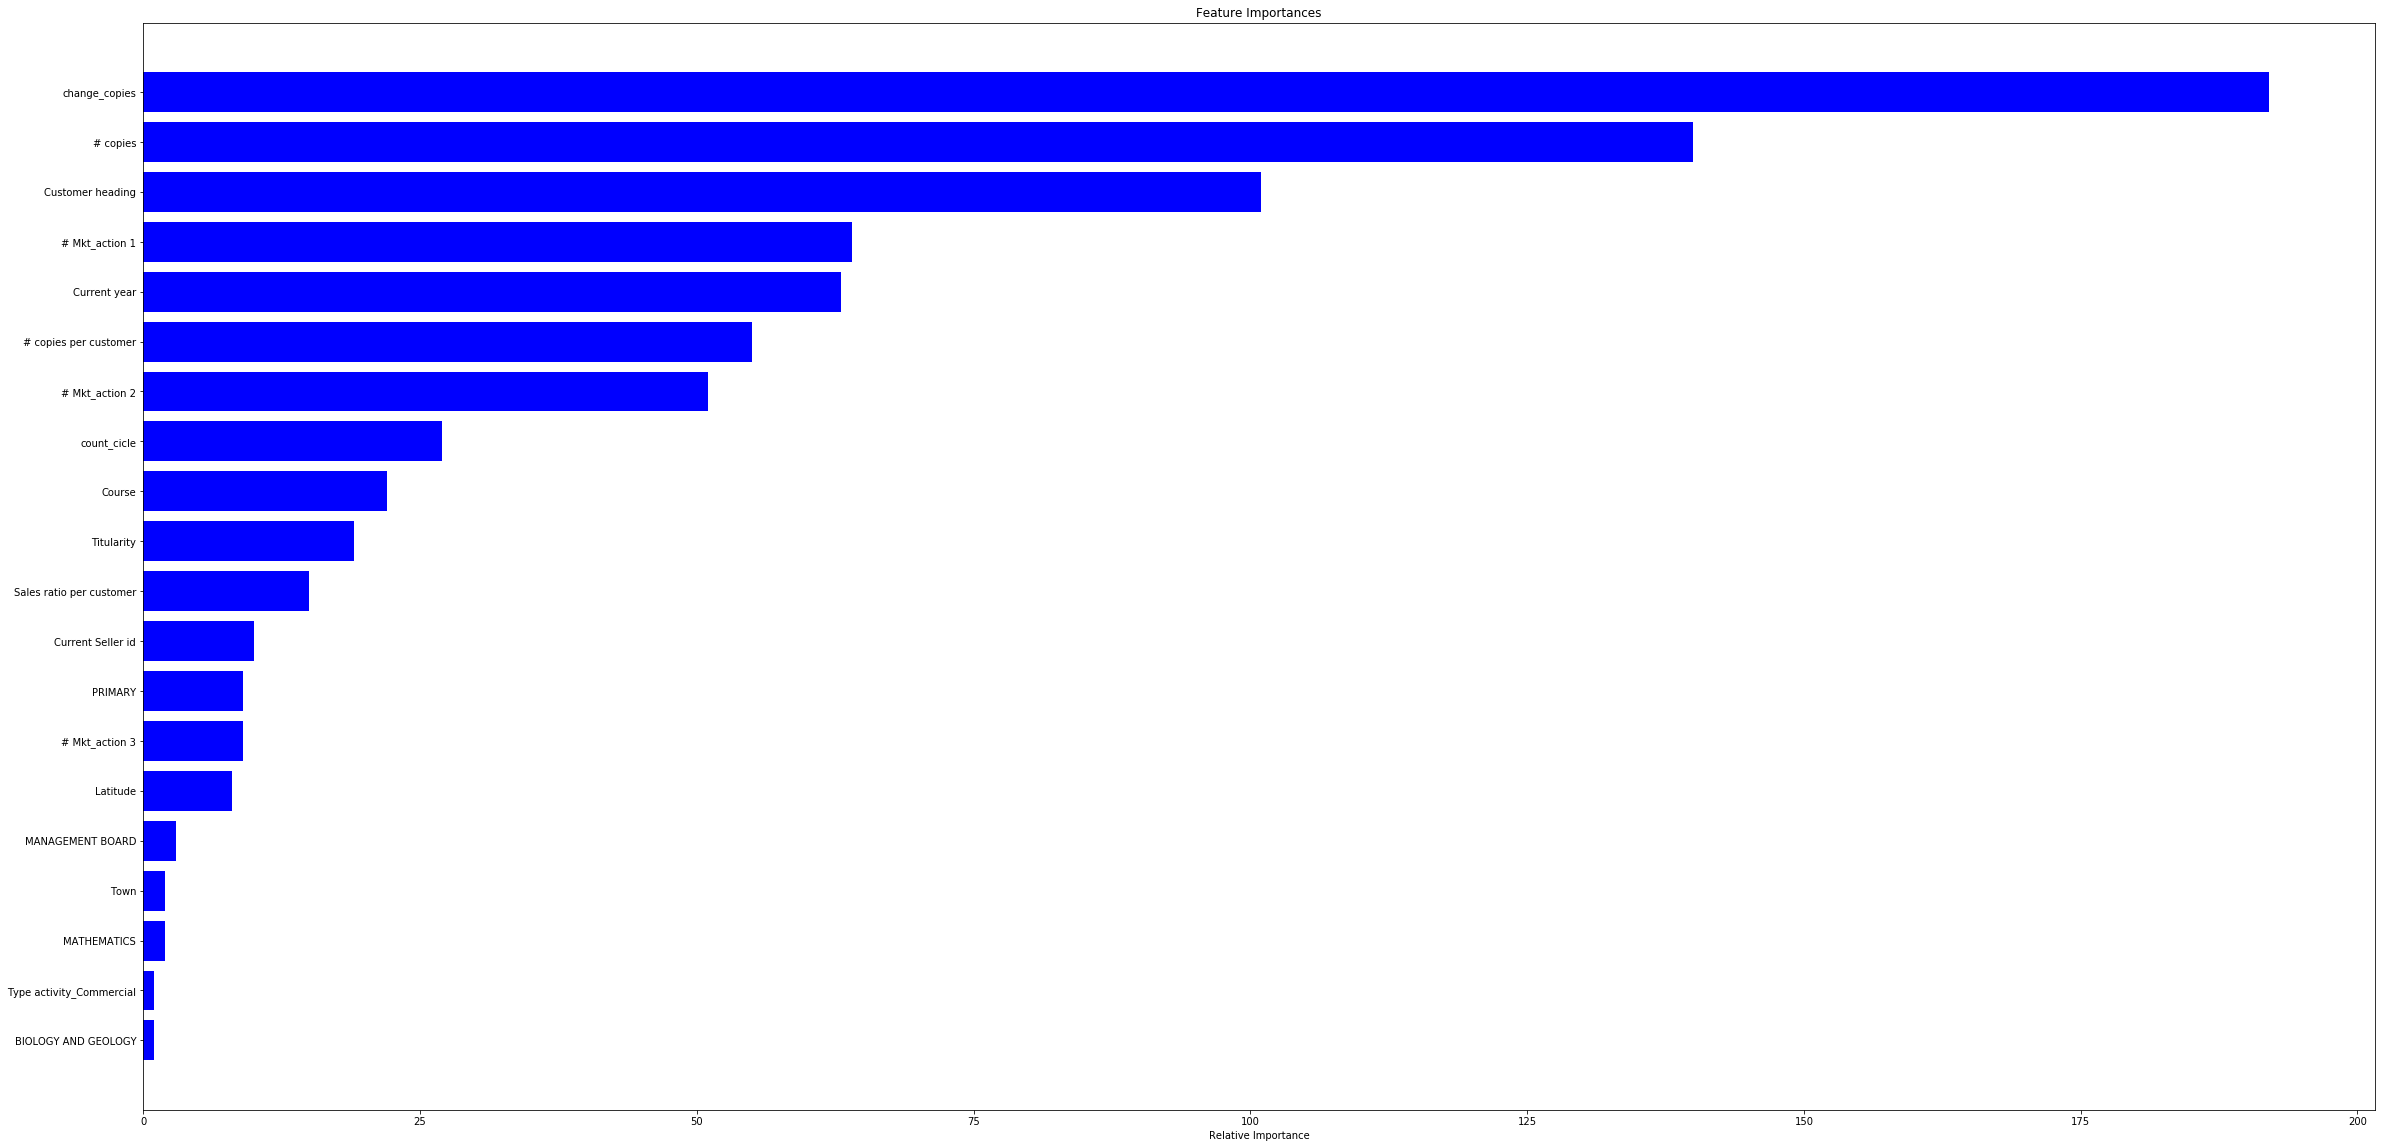

In [2148]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Subject 13

In [2018]:
full_data.to_csv("full_data.csv", index = False)

In [2149]:
train = subj_13[(subj_13['Current year'] == 2015) |(subj_13['Current year'] == 2016) | (subj_13['Current year'] == 2017)]
test = subj_13[(subj_13['Current year'] == 2018)]

In [2150]:
X, y_train = train.drop(["churn", "Subject"], axis = 1), train['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_train = transformation_pipeline.fit_transform(X)

X_test, y_test = test.drop(["churn", "Subject"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_test = transformation_pipeline.fit_transform(X_test)

In [2151]:
estimator = lgb.LGBMClassifier()

param_grid ={'num_leaves': [31, 25], 
             'min_child_weight': [1e-2, 1e-1, 1, 1e1, 1e2,],
             'reg_alpha' : [0, 1e-1, 1, 5, 10, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 100]}

scorers = { 'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score) }

grid_search_ = grid_search_wrapper(refit_score='accuracy_score')

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:  

Best params for accuracy_score
{'min_child_weight': 0.01, 'num_leaves': 31, 'reg_alpha': 10, 'reg_lambda': 0.1}
              precision    recall  f1-score   support

     class_0       0.73      0.88      0.80       425
     class_1       0.83      0.65      0.73       390

    accuracy                           0.77       815
   macro avg       0.78      0.76      0.76       815
weighted avg       0.78      0.77      0.77       815


Confusion matrix optimized for accuracy_score on the test data:
         pred_class_0  pred_class_1
class_0           375            50
class_1           138           252
Accuracy_score on the test data:
0.7693251533742331


In [2034]:
import lightgbm as lgb

In [2152]:
model_lgb =lgb.LGBMClassifier(min_child_weight= 0.01, num_leaves= 31, reg_alpha= 10, reg_lambda=0.1).fit(X_train, y_train)

In [2153]:
print ("Sorted Feature Importance:")
importances = model_lgb.feature_importances_
sorted_feature_importance = sorted(zip(importances, list(X.columns)), reverse=True)
#sorted_feature_importance  = sorted([*zip(X.columns, model_lgb.feature_importances_)], key=lambda tup: -tup[1], reverse=True)[:20]
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:20]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:20]]

Sorted Feature Importance:
[(206, 'change_copies'), (121, 'Customer heading'), (83, '# copies'), (29, '# Mkt_action 1'), (26, '# copies per customer'), (14, 'Course'), (13, 'Town'), (13, 'MANAGEMENT BOARD'), (8, '# Mkt_action 3'), (5, 'Type activity_Commercial'), (5, '# Mkt_action 2'), (0, 'total_visits_2015'), (0, 'count_cicle'), (0, 'UNALLOCATED'), (0, 'Type activity_Support'), (0, 'Type activity_Prospecting'), (0, 'Type activity_Presentation'), (0, 'Type activity_Others'), (0, 'Type activity_Internal'), (0, 'Type activity_In-house training'), (0, 'Type activity_Implementation'), (0, 'Type activity_Customer training'), (0, 'Type activity_Collect Information'), (0, 'Type activity_Administration'), (0, 'Type Current Support'), (0, 'Titularity'), (0, 'TECHNOLOGY'), (0, 'Sales ratio per customer'), (0, 'SPANISH LANGUAGE'), (0, 'SCIENCE'), (0, 'RELIGION (PRIMARY)'), (0, 'REGIONAL LANGUAGE'), (0, 'QUALITY'), (0, 'PRIMARY'), (0, 'PLASTIC COURSE'), (0, 'PHYSICS AND CHEMISTRY'), (0, 'PHILOSOP

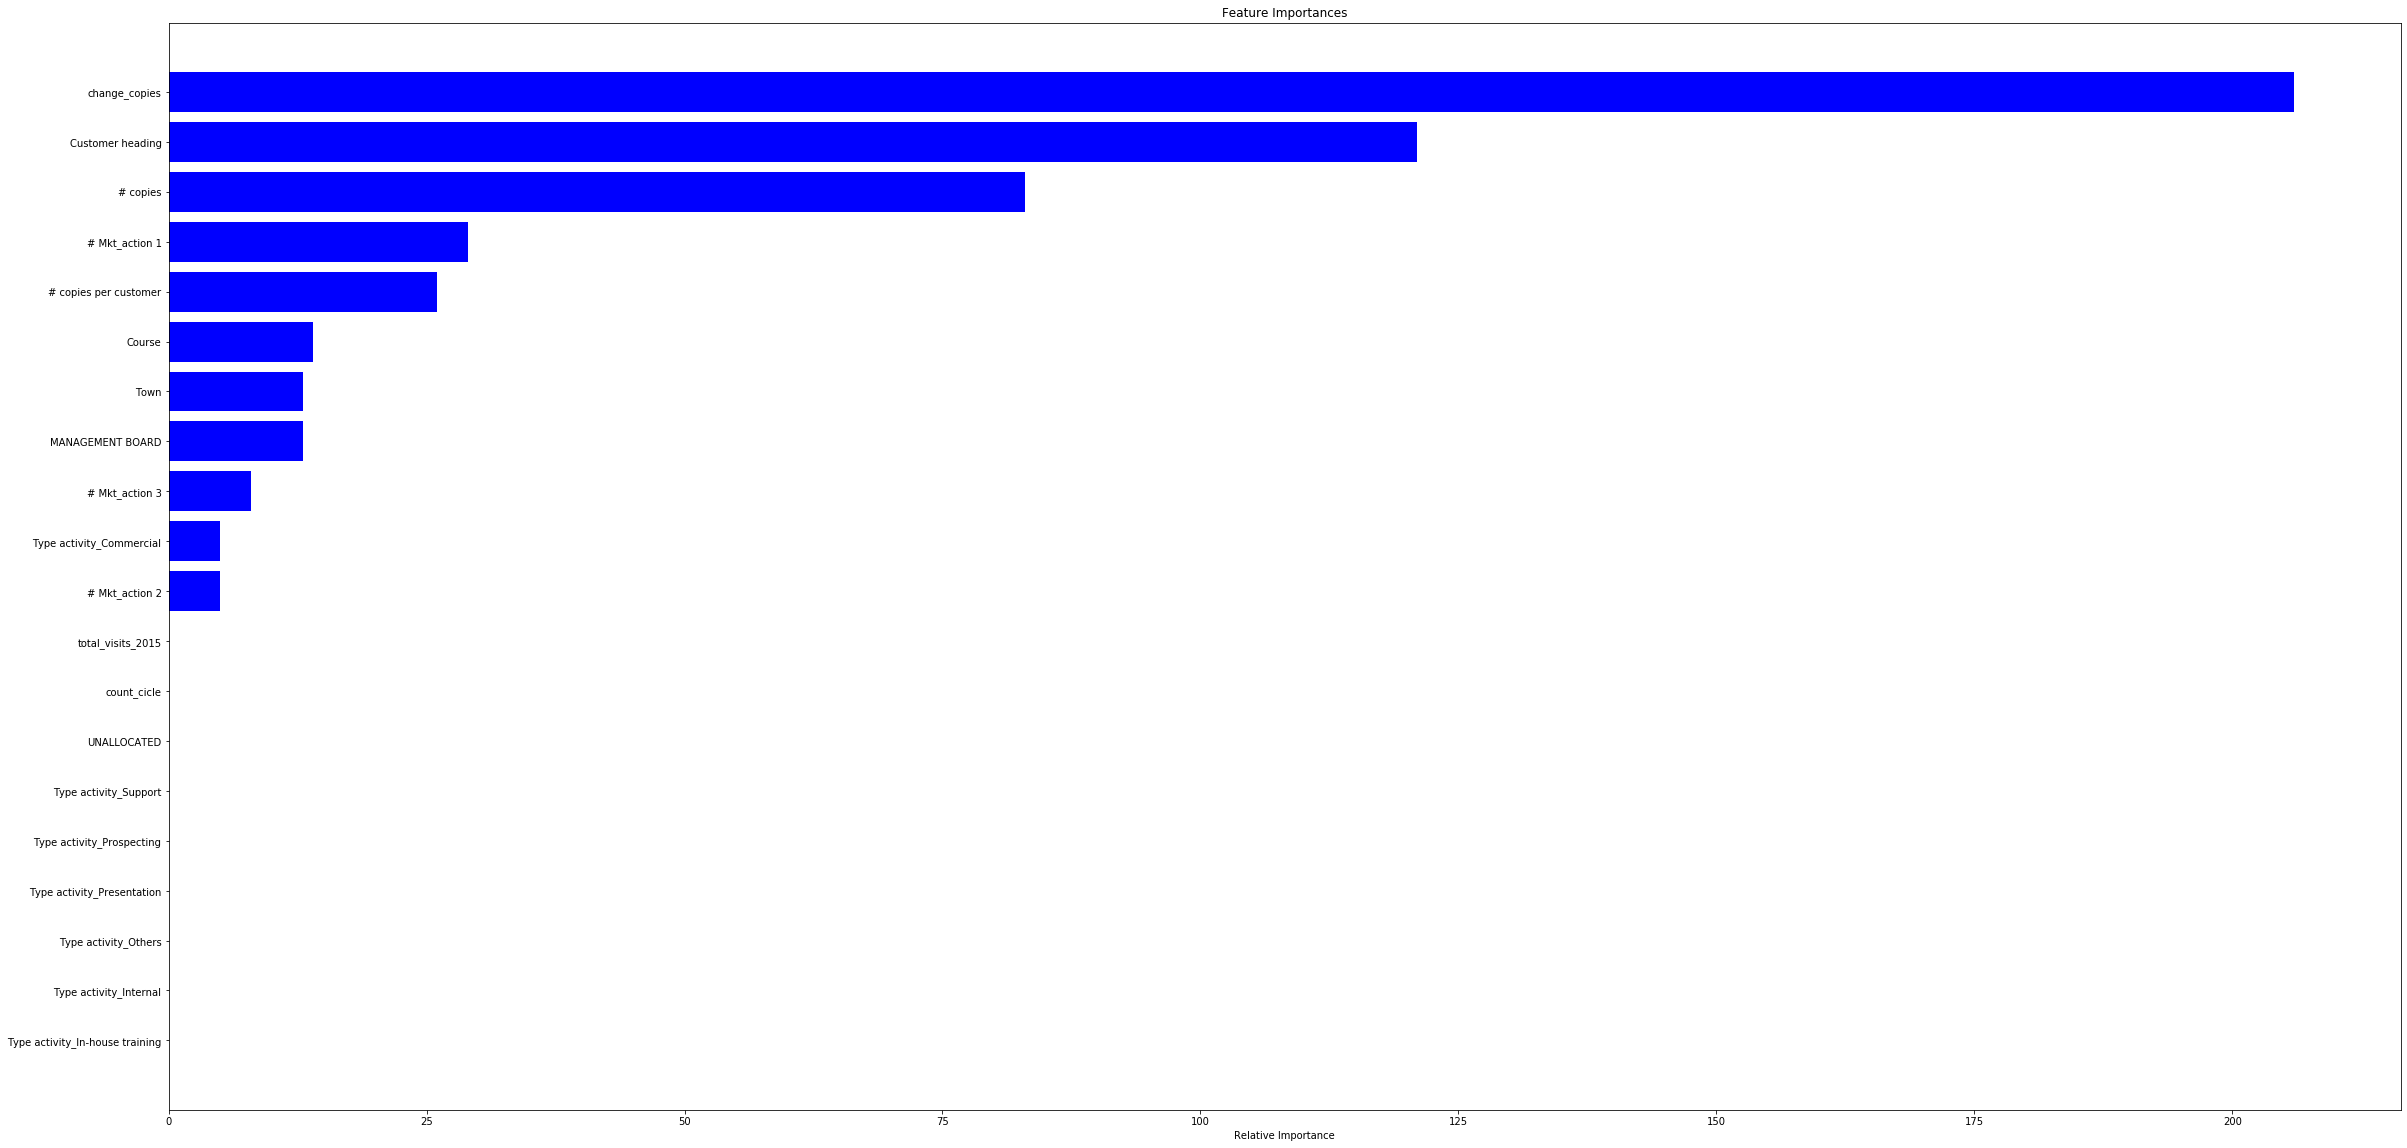

In [2154]:
fig =plt.subplots(figsize=(40,20))
a = list(range(19,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## end of models per subject

In [1910]:
train.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'key', 'churn',
       'change_copies', 'total_visits', 'Numer_of_Representatives',
       'Sales ratio per customer', '# copies per customer'],
      dtype='object')

In [1910]:
train.columns

Index(['Course', 'Customer heading', 'Subject', '# copies',
       'Type Current Support', 'Current year', 'Latitude', 'Longitude', 'Town',
       'Current Seller id', 'Institution', 'Titularity', 'key', 'churn',
       'change_copies', 'total_visits', 'Numer_of_Representatives',
       'Sales ratio per customer', '# copies per customer'],
      dtype='object')

In [1855]:
grid_search_forest.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [1858]:
accuracy_score(y_test,grid_search_forest.best_estimator_.predict(X_prep_test))

0.7559704002690885

In [1857]:
X_test, y_test = test.drop(["churn"], axis = 1), test['churn']

transformation_pipeline = Pipeline([('count_encoder', CountEncoder()),
                ('scaler', StandardScaler())])

X_prep_test = transformation_pipeline.fit_transform(X_test)



In [ ]:
X_prep_test = transformation_pipeline.fit_transform(X)

In [1664]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19697 entries, 0 to 19696
Data columns (total 18 columns):
Course                      19697 non-null int64
Customer heading            19697 non-null float64
Subject                     19697 non-null int64
# copies                    19697 non-null int64
Type Current Support        19697 non-null int64
Current year                19697 non-null int64
Latitude                    19697 non-null float64
Longitude                   19697 non-null float64
Town                        19697 non-null category
Current Seller id           19697 non-null float64
Institution                 19697 non-null category
Titularity                  19697 non-null category
key                         19697 non-null category
change_copies               19697 non-null float64
total_visits                19697 non-null float64
Numer_of_Representatives    19697 non-null int64
Sales ratio per customer    19697 non-null float64
# copies per customer       1969